# PHYS512 Final Project: Stacking Analysis over Simulation of the $[CII]$ Signal

Prof: Jon Sievers, TAs: Marcus Merryfield, Rigel Zifkin, Daniel Coelho

by Patrick Horlaville

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u

from lim import lim

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) 
from scipy.ndimage import gaussian_filter

In [148]:
import imageio

## 1. Introduction

Galaxy formation and star forming processes at high redshift, crucial to the history of our modern Universe, are becoming the focus point of many astrophysical observational endeavours in the advent of the necessary observing tools to start probing distant galaxies. One of the target frequencies of this investigation is the 158 $\mu$m rest-frame $\rm{[CII]}$ line. As a major coolant of the neutral atomic gas of the interstellar medium, the $\rm{[CII]}$ signal is proportional to the heating rate and the fraction of atomic gas. Additionally, it is the strongest emission line of star forming galaxies at rest-frame far-infrared wavelength, which makes it the ideal tracer for galactic star formation rate (SFR) [1, 2].


Observations of local galaxies have revealed a linear scaling relationship the $\rm{[CII]}$ luminosity $L_{\rm{CII}}$ and SFR [e.g., 3]. At higher redshifts ($z > 5$), various small scale surveys have yielded divergent results: some report that the linear scaling from the lower redshifts persists [e.g., 4], while others report a systematic decrease of the $\rm{[CII]}$ luminosity, the so-called "$\rm{CII}$ deficit" [e.g., 5]. Hence, it is important in order to shed light on this problem to try to build better models of the $\rm{[CII]}$ signal.

## 2. Previous Work [from this Summer]

### Context

This project is led following my research project at the Canadian Institute for Theoretical Astrophysics (CITA) during Summer 2022, during which I implemented a new model for the $\rm{[CII]}$ signal within Prof. Dick Bond's group. The first step of the project was to revive an old line intensity mapping package called `limlam_mocker` developed in 2018 by Dr. George Stein and Dr. Dongwoo Chung, my supervisor at CITA. The final goal was to add a new $\rm{[CII]}$ model to this package, which would allow to retrieve, for a given lightcone of simulated halos (around $z \sim 5 - 8$), the $\rm{[CII]}$ signal of those halos from their masses (in our lightcone, halo masses are of order $10^{10} \sim 10^{12} M_{\odot}$).

### The Model

The model arose from a newly-derived relationship for $L_{\rm{CII}}$ found by another member of prof. Dick Bond's group, Dr. Lichen Liang. 

By using FIRE (Feedbacks In Realistic Environments) full cosmological volume simulations between $z \sim 0 - 8$, Liang et al. (in prep.) observed the following relationship of galactic halo properties:

[1] : $\frac{L_{\rm{[CII]}}/L_{\odot}}{\rm{SFR}/(M_{\odot}yr^{-1})} \propto f_{\rm{[CII]}}\overline{Z}_{\rm{gas}}t_{\rm{dep}}\overline{n}_{\rm{gas}}$

where:

- $L_{\rm{[CII]}} = \rm{[CII]}$luminosity

- $f_{\rm{[CII]}}$ = fraction of total gas mass that comes from HI and HII regions

- $\overline{Z}_{\rm{gas}}$ = gas metallicity

- $t_{\rm{dep}} \equiv \frac{M_{\rm{gas}}}{\rm{SFR}}$ = galactic gas depletion time scale

- $\overline{n}_{\rm{gas}}$ = gas density statistical average

By multipliying both sides of the equation by the SFR, and if we suppose that the galactic $\rm{HI}$ mass is the main $\rm{[CII]}$ contributor across each galaxy (such that $M_{\rm{HI}} \sim f_{\rm{[CII]}} M_{\rm{gas}}$), we retrieve a proportionality relationship:

[2] : $L_{\rm{[CII]}} \propto M_{\rm{HI}}$

Which we parametrize as:

[3] : $L_{\rm{[CII]}}/L_{\odot} = \alpha_{\rm{[CII]}} \times M_{\rm{HI}}/M_{\odot}$

Where $\alpha_{\rm{[CII]}}$ is the proportionality coefficient the $\rm{HI}$ mass and the $\rm{[CII]}$ luminosity. We would like express $M_{\rm{HI}}$ as a function of halo mass $M_{\rm{halo}}$ and we would like to determine an estimate for $\alpha_{\rm{[CII]}}$ at our redshift ($z \sim 5 - 8$). The literature provides prescriptions for $M_{\rm{HI}}(M_{\rm{halo}} relationships, e.g. Villaescua-Navarro et al. (2018):

[4] : $M_{\rm{HI}}(M_{\rm{halo}}) = M_0 (\frac{M_{\rm{halo}}}{M_{\rm{min}}})^{\alpha} {exp}(- (\frac{M_{\rm{min}}}{M_{\rm{halo}}})^{0.35})$

Where $M_0$, $M_{\rm{min}}$ and $\alpha$ are the fit parameters to the relationship. Here we use their parametrization for $z = 5$: $M_0$ = $1.9 \times 10^9 M_{\odot}$, $M_{\rm{min}}$ = $2.0 \times 10^{10} M_{\odot}$ and $\alpha$ = 0.74.

We use the SFR as a mediator to find our parameter $\alpha_{\rm{[CII]}}$: for a particular value of SFR, we would like to know what are the corresponding halo mass $M_{\rm{halo}}$ and the $\rm{[CII]}$ luminosity of a halo in our redshift range. For the $M_{\rm{halo}}/\rm{SFR}$ relationship, we can use a standard prescription, such as from Behroozi et al., 2013. This SFR model is incorporated into the `limlam_mocker` package, so we can interpolate the $M_{\rm{halo}}$ from the SFR handily. For the $L_{\rm{[CII]}}/\rm{SFR}$ relationship, we can use another result from Liang et al. (in prep.):

[5] : $\frac{L_{\rm{[CII]}}}{L_{\odot}} \sim 10^7 \times \frac{\rm{SFR}}{M_{\odot} yr^{-1}}$

So we can just pick a value of SFR, $\rm{SFR}^*$, and find the corresponding $L_{\rm{[CII]}}^*$ and $M_{\rm{halo}}^*$ with the models described above. With $M_{\rm{halo}}^*$, we can find $M_{\rm{HI}}^*$ with the Villaescua-Navarro et al. (2018) model.

By using $\rm{SFR}^* = 1 \frac{M_{\odot}}{yr}$, we retrieved a value of $\alpha_{\rm{[CII]}} \sim 0.005$ for our redshift range. By substituting this coefficient in equation [3] and by using equation [4] to parametrize $M_{\rm{HI}}$, we have a recipe to retrieve halos' $\rm{[CII]}$ luminosity $L_{\rm{[CII]}}$ from their mass $M_{\rm{halo}}$.

### The Forecast

Now that we are able to model the $\rm{[CII]}$ of halos from their masses, we would like to produce forecasts of future experiments that aim towards observing the $\rm{[CII]}$ signal of halos in our redshift range ($z \sim 5 - 8$). The CCAT-prime collaboration and their upcoming Fred Young Submillimeter Telescope (first light expected in 2024) have as a primary science objective to probe the $\rm{[CII]}$ line in our $z$ range, hence it would be relevant to model what would their observations look like given our model of the signal.

The model of the forecast is rather simple and consists of adding a Gaussian noise on top of the signal. Our maps are three dimensional: in RA, DEC and redshift $z$. We add a sensitivity per voxel to each point of our map. For mm-wave observations, this sensitivity is given by:

$\sigma_{n} = \frac{\rm{NEI}}{\sqrt{t_{\rm{pix}} N_{\rm{feeds}}}}$

where $t_{\rm{pix}}$ is the observation time for each detector, $N_{\rm{feeds}} is the number of instruments' feeds and the NEI is the Noise Equivalent Intensity, which is an indicator of the sensitivity per instrumental pixel per spectral element. It is defined by:

$\rm{NEI} = \frac{\rm{NEFD}}{\Omega_{\rm{beam}}}$

Where the NEFD is the Noise Equivalent Flux Density (the noise per beam) and $\Omega_{\rm{beam}}$ is the angular sky coverage of the telescope. For the FYST instrument, we have the given values (Chung et al., 2020): 

- NEFD = 72.5 mJy $\rm{s}^{1/2}$

- $\Omega_{\rm{beam}}$ = 4 $\rm{deg}^2$ 

- $t_{\rm{pix}}$ = 0.016h

- $N_{\rm{feeds}}$ = 120

### Showing the Results

Here I show my results from this Summer, which display the $\rm{[CII]}$ signal next to the FYST forecast. Here, I pick a total observing time of 40,000h for illustration. I show the raw resulting maps and the Gaussian-filtered maps.

In [2]:
m = lim()
m_noise = lim('Lichen',doSim = True)
m_noise.update(tobs = 40000*u.hr)

noisy_40 = m_noise.noise_added_map
nonoise_40 = m_noise.maps

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation
Loading .npz catalogues...


**Note**: The `m_noise` object is a `lim` object: out of it, we can retrieve all the data products we want of our simulation (the noiseless signal attribute (`.maps`), the noiseless signal convolved with the noise of FYST (`.noise_added_map`), as well as many other properties we will use later).

Here, each map is plotted as a cross section of their three dimensional lightcones, at redshift $z \sim 6$:

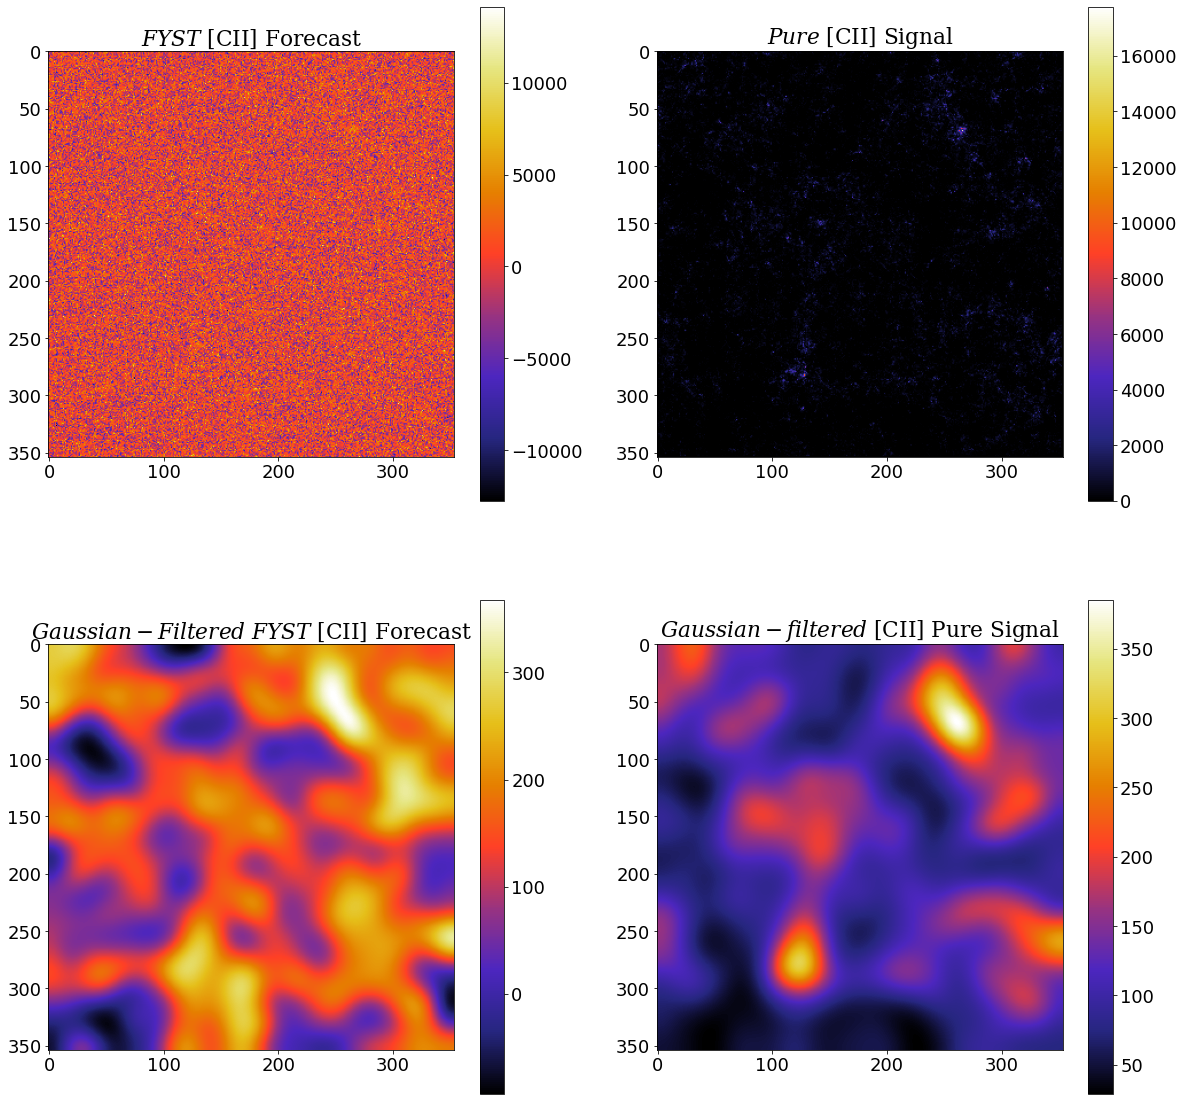

In [21]:
fig , axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))

plt.subplot(221)
plt.imshow(noisy_40[:,:,3], cmap = 'CMRmap') 
plt.title(r'$FYST\ \rm{[CII]}\ Forecast$', math_fontfamily = 'dejavuserif') 
plt.colorbar()

plt.subplot(222)
plt.imshow(nonoise_40[:,:,3], cmap = 'CMRmap') 
plt.title(r'$Pure\ \rm{[CII]}\ Signal$', math_fontfamily = 'dejavuserif')
plt.colorbar()

plt.subplot(223)
plt.imshow(gaussian_filter((noisy_40[...,3]),15), cmap = 'CMRmap') 
plt.title(r'$Gaussian-Filtered\ FYST\ \rm{[CII]}\ Forecast$', math_fontfamily = 'dejavuserif') 
plt.colorbar()

plt.subplot(224)
plt.imshow(gaussian_filter((nonoise_40[...,3]),15), cmap = 'CMRmap') 
plt.title(r'$Gaussian-filtered\ \rm{[CII]}\ Pure\ Signal$', math_fontfamily = 'dejavuserif') 
plt.colorbar()

## 3. The Project

As shown by the raw $\rm{[CII]}$ maps, the signal to noise ratio of the FYST forecasts are not extraordinary (for example, notice that the patterns of the raw map are only loosely found on the forecast, and that much of the forecast's patterns are absent from the true signal, which means that a significant part of our forecast is dominated by noise).

In an attempt to better characerize halos' $\rm{[CII]}$ signal, this project aims at performing a stacking analysis over all the halos from the map. Additionally, we can look at how this stacked signal evolves as the total observing time increases, and how it converges towards the pure signal's stacked map.

Our lightcone is three dimensional (RA, DEC, $z$). As shown in the previous figure, for now we focus on plotting slices of our map at specific redshifts. What we would like to do is:

- 0) apply a lower bound on the halo masses we will consider for our stacking analysis;

- 1) to identify, on our 2D map, all the halos from our lightcone;

- 2) to select an area around each halo on our 2D map;

- 3) to stack the $\rm{[CII]}$ signal of all halos on their selected surrounding areas;

- 4) to make a .gif of the stacked map as a function of total observed time.

### Step 0) Apply Mass Lowerbound

For illustration, let's set $2 \times 10^{10} M_{\odot}$ as the minimum halo mass for our stacking analysis. 


**Note**: We use the `.halos.M` attribute of our simulation to retrieve the masses of our halos:

In [48]:
thresh = m_noise.halos.M > 2*(10**10)

### Step 1) Locate Halos

There are two things to consider when identifying the halos on our map:

- The distribution of halos is essentially continous across our 3D map, whereas our 2D map is identified at a single particular $z$. Therefore, we need to determine an error on the redshift of our map which would include nearby halos (e.g., if our 2D map is at redshift $z = 6.012$ and some halo is at $z = 6.011$, we might want to consider that halo to be on our map if the nearby $z$ slices of our 3D map are located much farther away than this difference in $z$).

- The dimension of the map where the halos are located (RA/DEC) is different from the dimension shown on the axes of the map of our $\rm{[CII]}$ signa (they are showing pixel counts). So we first need to translate the halo positions from the RA/DEC space to a pixel space. 

The redshift of our 2D maps are:

In [51]:
map_zs = (m_noise.mapinst.nu_rest/m_noise.mapinst.nu_bincents) - 1

And the redshift of the 2D map shown earlier is:

In [53]:
map_zs[3]

6.025925925925924

So they are separated by:

In [52]:
np.ediff1d(map_zs)

array([0.07056729, 0.07204514, 0.0735699 , 0.07514359, 0.07676832,
       0.07844632, 0.08017994, 0.08197167, 0.08382413, 0.08574011,
       0.08772254, 0.08977453, 0.09189937, 0.09410056, 0.09638178,
       0.09874698, 0.10120032, 0.10374624, 0.10638946, 0.10913499])

Notice that the smallest separation between two $z$ slices is 0.07. We will hence start by taking an error on our redshift slice of 0.03. This means that in our catalog of simulated halos, we will accept for our map e.g. at $z = 6.026$ the halos that have a redshift in the interval [6.026 - 0.03, 6.026 + 0.03] = [5.996, 6.056].

The distribution of the redshifts of our halos is:

In [50]:
halo_zs = m_noise.halos.redshift[thresh]

And we select :

In [54]:
err = 0.03 
good_halo_zs = np.where(np.logical_and(halo_zs >= map_zs[3] - err, halo_zs <= map_zs[3] + err)) 

The RA and DEC of our halos can be retrieved with the `.halos.ra` and `.halos.dec` attributes:

In [55]:
halo_xs = m_noise.halos.ra[thresh][good_halo_zs]
halo_ys = m_noise.halos.dec[thresh][good_halo_zs]

Now, we can plot the halo positions in the RA/DEC space:

Text(0, 0.5, '$DEC$')

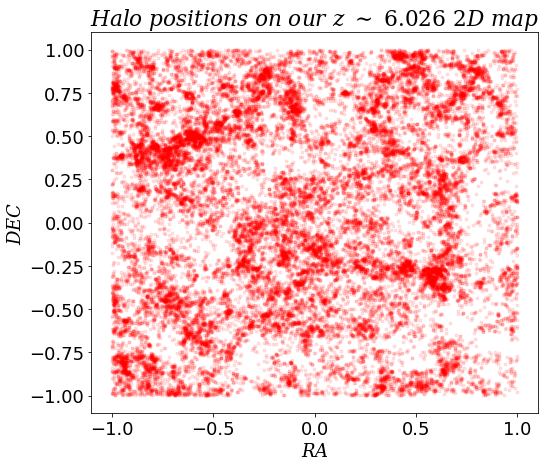

In [70]:
plt.scatter(halo_xs, halo_ys, marker = '.', c = 'r', alpha = 0.1)
plt.title(r'$Halo\ positions\ on\ our\ z\ \sim\ 6.026\ 2D\ map$', math_fontfamily = 'dejavuserif')
plt.xlabel(r'$RA$', math_fontfamily = 'dejavuserif')
plt.ylabel(r'$DEC$', math_fontfamily = 'dejavuserif')

We can retrieve the locations of the pixels of our $L_{\rm{[CII]}}$ map with the `.mapinst.pix_bincents` attributes, where the locations are given in the RA/DEC space. To determine which pixel correspond to the centers of each halo, we take the difference of coordinates with the RA/DEC positions of our halos and select the closest set of coordinates:

In [77]:
def halo_centpix(halo_xpos, halo_ypos):
    
    '''
    Parameters
    ----------
    
    halo_xpos: array_like
               list of RA coordinates of halos, from the original distribution of halos
    
    halo_ypos: array_like
               list of DEC coordinates of halos, from the original distribution of halos
               
    
    Returns
    -------
    
    halo_centpix_x: array_like
                    list of the x-pixel positions of halos, mapped on the lim map
    
    
    halo_centpix_x: array_like
                    list of the y-pixel positions of halos, mapped on the lim map
    
    '''
    
    halo_centpix_x = [0 for i in range(len(halo_xpos))]
    halo_centpix_y = [0 for i in range(len(halo_ypos))]

    for i in range(len(halo_xs)):
        halo_centpix_x[i] = np.argmin(np.abs(halo_xpos[i] - m_noise.mapinst.pix_bincents_x))
    for i in range(len(halo_ys)):
        halo_centpix_y[i] = np.argmin(np.abs(halo_ypos[i] - m_noise.mapinst.pix_bincents_y))
        
    return halo_centpix_x, halo_centpix_y 

In [74]:
halo_centpix_x, halo_centpix_y = halo_centpix(halo_xs, halo_ys)

Text(0, 0.5, '$y-pixels$')

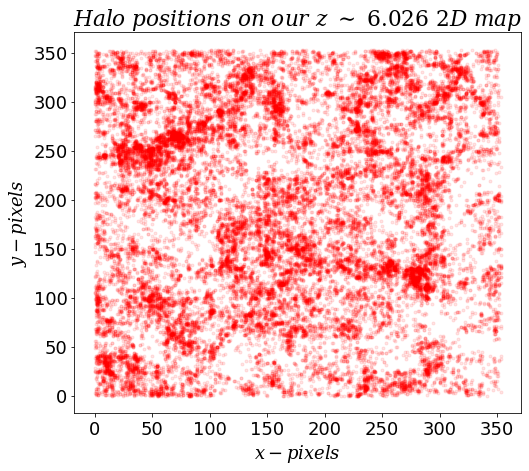

In [76]:
plt.scatter(halo_centpix_x, halo_centpix_y, marker = '.', c = 'r', alpha = 0.1)
plt.title(r'$Halo\ positions\ on\ our\ z\ \sim\ 6.026\ 2D\ map$', math_fontfamily = 'dejavuserif')
plt.xlabel(r'$x-pixels$', math_fontfamily = 'dejavuserif')
plt.ylabel(r'$y-pixels$', math_fontfamily = 'dejavuserif')

We have now identified the relevant halos to our map. Now, we would like to make a selection of pixels surrounding each of those halos.

### Step 2) Select the Stacking Area

First, we need to select the range of $x$ and $y$ pixels surrounding each halo center. Let's say that we take an $n \times n$ pixel² area. Then, the range of the $x$ and $y$ pixels can be found with:

In [78]:
def halo_map(n, halo_xpos, halo_ypos):
    
    '''
    Parameters
    ----------
    
    n: int
       Size of the desired stacked map
        
    halo_xpos: array_like
               List of RA positions of halos
    
    halo_ypos: array_like
               List of DEC positions of halos
           
           
    Returns
    -------
    
    halo_mapx: array_like
               Range of x-pixels for the stacked map
               
    halo_mapy: array_like
               Range of y-pixels for the stacked map
    '''
    
    halo_mapx = [0 for i in range(len(halo_xpos))]
    halo_mapy = [0 for i in range(len(halo_ypos))]
    
    halo_centpix_x, halo_centpix_y = halo_centpix(halo_xpos, halo_ypos)

    for i in range(len(halo_xpos)):
        halo_mapx[i] = np.linspace(halo_centpix_x[i] - (n - 1)/2, halo_centpix_x[i] + (n - 1)/2, n)
    for i in range(len(halo_ypos)):
        halo_mapy[i] = np.linspace(halo_centpix_y[i] - (n - 1)/2, halo_centpix_y[i] + (n - 1)/2, n)
    
    return halo_mapx, halo_mapy

In [79]:
halo_map_x, halo_map_y = halo_map(20, halo_xs, halo_ys)

Below is shown an example of a stacked area: we look at the first halo in the list, and we plot the locations of the pixels we will use for the stacking. It's a 20 by 20 grid:

Text(0, 0.5, '$y-pixels$')

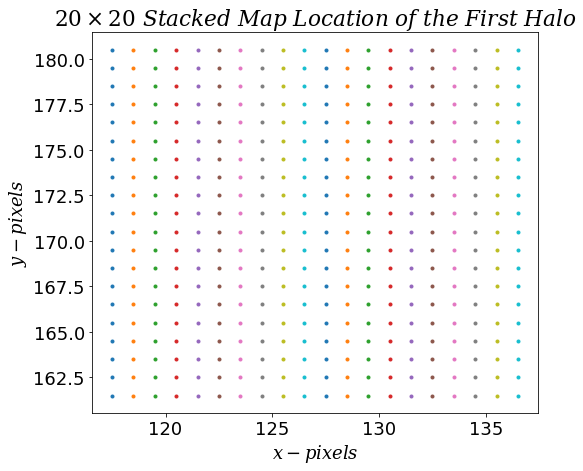

In [84]:
halo_grid = np.meshgrid(halo_map_x[0], halo_map_y[0])
plt.plot(halo_grid[0], halo_grid[1], '.')
plt.title(r'$20 \times 20\ Stacked\ Map\ Location\ of\ the\ First\ Halo$', math_fontfamily = 'dejavuserif')
plt.xlabel(r'$x-pixels$', math_fontfamily = 'dejavuserif')
plt.ylabel(r'$y-pixels$', math_fontfamily = 'dejavuserif')

### Step 3) Stack the $\rm{[CII]}$ Signal

Now, all we need to do is to retrieve the $\rm{[CII]}$ over each point of the grid, for all halos, and to take the average to obtain the stacked $\rm{[CII]}$ signal over all halos. However, there is a subtlety to consider: if the halos are close to the edge of the map, then their generated stacked map goes out of the frame of the map. Therefore, if the position of any selected is out of the frame, it won't contribute to the stacked map. 


Our final object will have a size a shape of $n \times n \times n_{\rm{halos}}$. All we'll have left to do is to take the average over each pixel.

In [120]:
def lum(CII_map, ind, n, halo_xpos, halo_ypos):
    
    '''
    Parameters
    ----------
    
    CII_map: lim_object
             The `lim` object of the generated [CII] simulation
    
    n: int
       Size of the stacked map
       
    halo_xpos: array_like
               List of RA positions of halos
    
    halo_ypos: array_like
               List of DEC positions of halos
    
    Returns
    -------
    
    lum: array_like
         n by n by n_halo list of the [CII] luminosities of all the halo maps to be averaged in order to retrieve the stacked map    
    '''
    
    halo_mapx, halo_mapy = halo_map(n, halo_xpos, halo_ypos)
    
    npix_x, npix_y = CII_map.mapinst.npix_x + 1, CII_map.mapinst.npix_y + 1
    n_halos = len(halo_xpos)

    lum_noisy   = [[[[] for i in range(n)] for j in range(n)] for k in range(n_halos)]
    lum_nonoise = [[[[] for i in range(n)] for j in range(n)] for k in range(n_halos)]

    for i in range(n_halos):
        for j in range(len(halo_mapx[i])):
            for k in range(len(halo_mapy[i])):
                if int(halo_mapx[i][j]) < npix_x:
                    if int(halo_mapy[i][k]) < npix_y:
                            lum_noisy[i][j][k]   = CII_map.noise_added_map[int(halo_mapx[i][j]), int(halo_mapy[i][k]), ind]
                            lum_nonoise[i][j][k] = (CII_map.maps[int(halo_mapx[i][j]), int(halo_mapy[i][k]), ind]).value
                    else:
                        lum_noisy[i][j][k]   = np.nan
                        lum_nonoise[i][j][k] = np.nan
                else:
                    lum_noisy[i][j][k]   = np.nan
                    lum_nonoise[i][j][k] = np.nan
        
    return lum_noisy, lum_nonoise

In [125]:
m_noise.update(tobs = 40000*u.hr)

In [126]:
CII_total_noise, CII_total_pure = lum(m_noise, 3, 20, halo_xs, halo_ys)

Loading .npz catalogues...


In [127]:
CII_stack_noise, CII_stack_pure = np.nanmean(CII_total_noise, axis = 0), np.nanmean(CII_total_pure, axis = 0)

In [128]:
m_noise.tobs

<Quantity 40000. h>

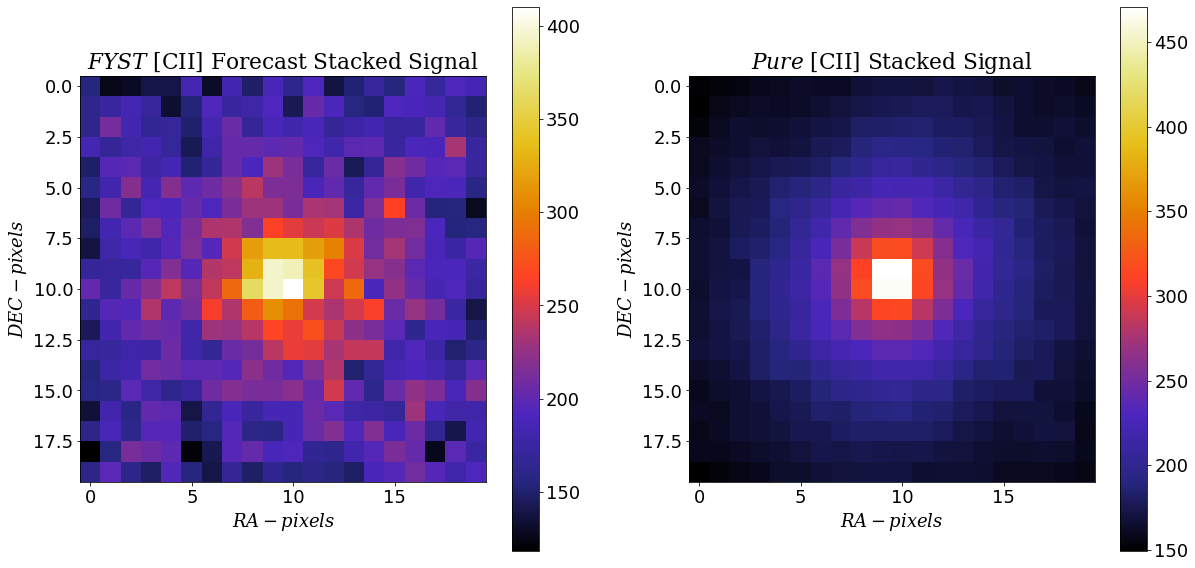

In [129]:
fig , axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

plt.subplot(121)
plt.imshow(CII_stack_noise, cmap = 'CMRmap')
plt.title(r'$FYST\ \rm{[CII]}\ Forecast\ Stacked\ Signal$', math_fontfamily = 'dejavuserif')
plt.xlabel(r'$RA-pixels$', math_fontfamily='dejavuserif')
plt.ylabel(r'$DEC-pixels$', math_fontfamily='dejavuserif')
plt.colorbar()

plt.subplot(122)
plt.imshow(CII_stack_pure, cmap = 'CMRmap')
plt.title(r'$Pure\ \rm{[CII]}\ Stacked\ Signal$', math_fontfamily = 'dejavuserif')
plt.xlabel(r'$RA-pixels$', math_fontfamily='dejavuserif')
plt.ylabel(r'$DEC-pixels$', math_fontfamily='dejavuserif')
plt.colorbar()

The right panel shows the stacked map of the pure $\rm{[CII]}$ signal, while the left panel shows the stacked map of the FYST $\rm{[CII]}$ forecast stacked map. As we can see, even though the raw forecast map shown earlier does not highlight the detection of the $\rm{[CII]}$ signal above the noise level, the stacked map highlights a very similar pattern as the pure signal map.

### Step 4) Making the .gif

In [130]:
def lum_noise(CII_map, ind, n, halo_xpos, halo_ypos):
    
    '''
    Parameters
    ----------
    
    CII_map: lim_object
             The `lim` object of the generated [CII] simulation
    
    n: int
       Size of the stacked map
       
    halo_xpos: array_like
               List of RA positions of halos
    
    halo_ypos: array_like
               List of DEC positions of halos
    
    Returns
    -------
    
    lum: array_like
         n by n by n_halo list of the [CII] luminosities of all the halo maps to be averaged in order to retrieve the stacked map    
    '''
    
    halo_mapx, halo_mapy = halo_map(n, halo_xpos, halo_ypos)
    
    npix_x, npix_y = CII_map.mapinst.npix_x + 1, CII_map.mapinst.npix_y + 1
    n_halos = len(halo_xpos)

    lum_noisy  = [[[[] for i in range(n)] for j in range(n)] for k in range(n_halos)]

    for i in range(n_halos):
        for j in range(len(halo_mapx[i])):
            for k in range(len(halo_mapy[i])):
                if int(halo_mapx[i][j]) < npix_x:
                    if int(halo_mapy[i][k]) < npix_y:
                            lum_noisy[i][j][k]   = CII_map.noise_added_map[int(halo_mapx[i][j]), int(halo_mapy[i][k]), ind]
                    else:
                        lum_noisy[i][j][k]   = np.nan
                else:
                    lum_noisy[i][j][k]   = np.nan
        
    return lum_noisy

In [132]:
CII_total_noise_t = lum_noise(m_noise, 3, 20, halo_xs, halo_ys)

In [133]:
m_noise = lim('Lichen',doSim=True)
mass_cut = 2*(10**10)
err = 0.03
ind = 3

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [134]:
t_obs_arr = np.linspace(2000, 100000, 50)

In [135]:
noisy_tot_mov = [[] for i in range(len(t_obs_arr))]

for i in range(len(t_obs_arr)):

    m_noise.update(tobs = (t_obs_arr[i])*u.hr)
    
    noisy_tot_mov[i] = lum_noise(m_noise, 3, 20, halo_xs, halo_ys)

Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
Loading .npz catalogues...
L

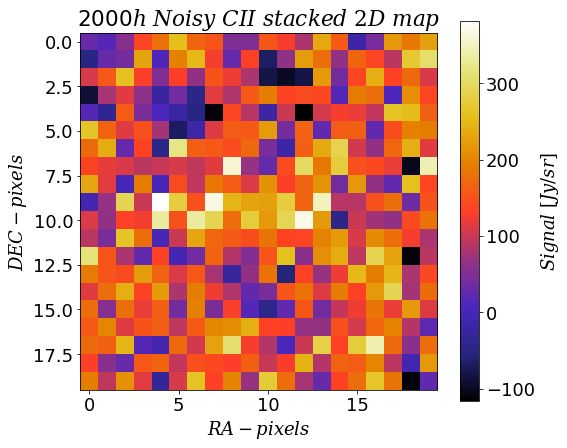

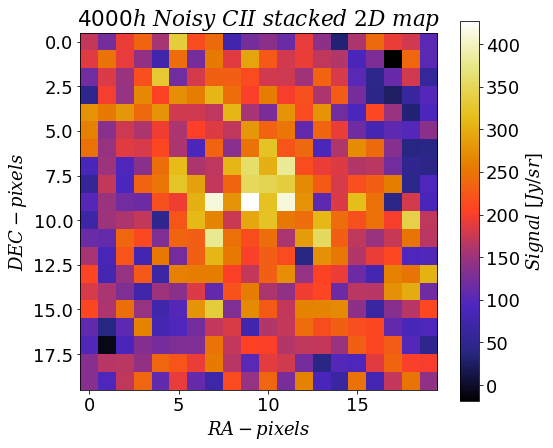

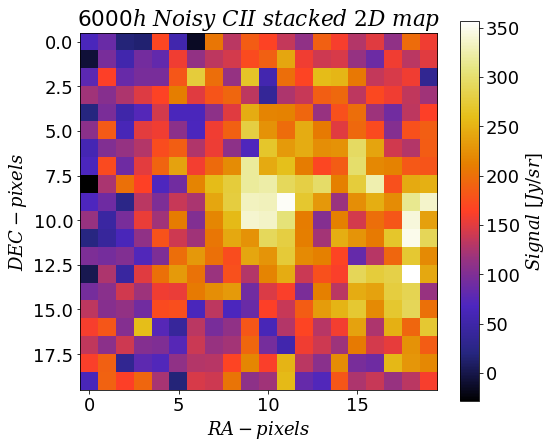

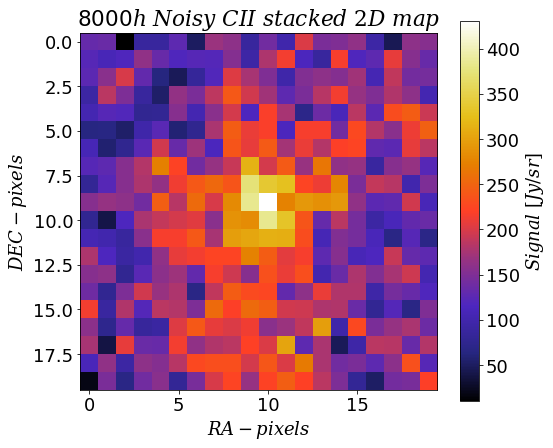

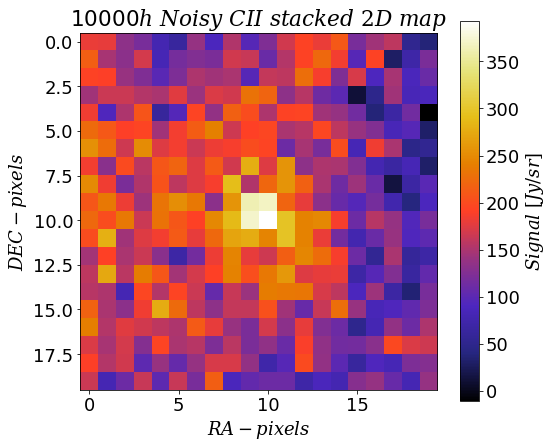

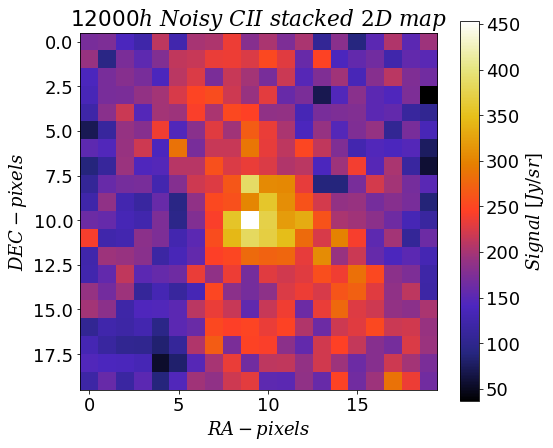

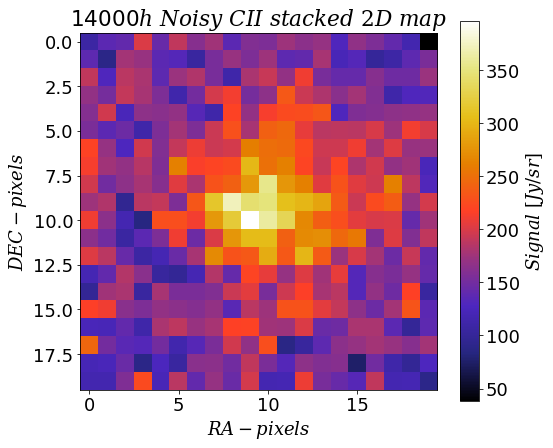

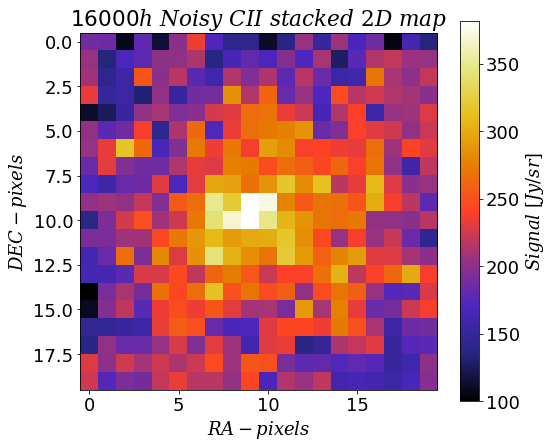

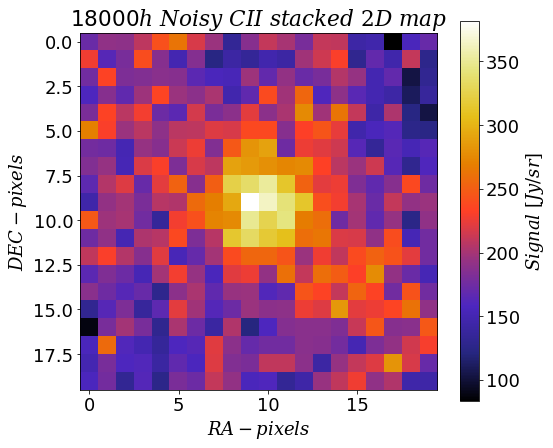

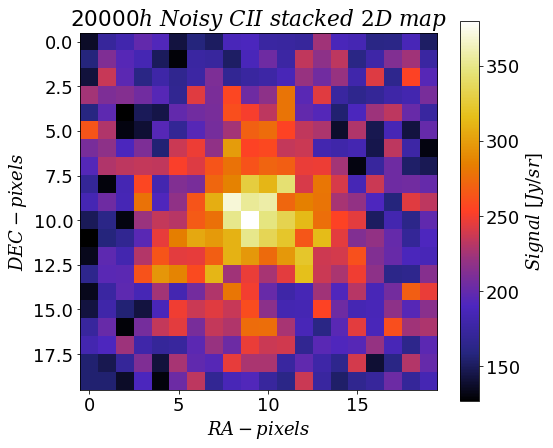

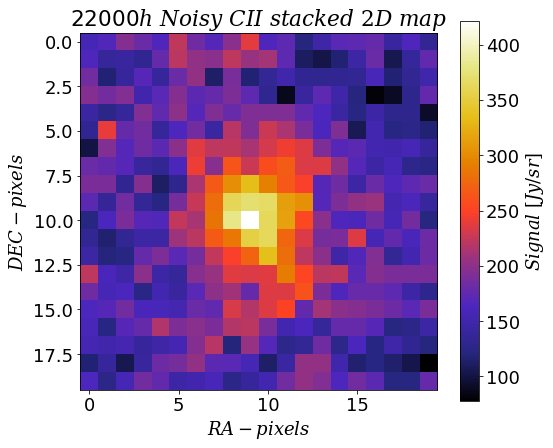

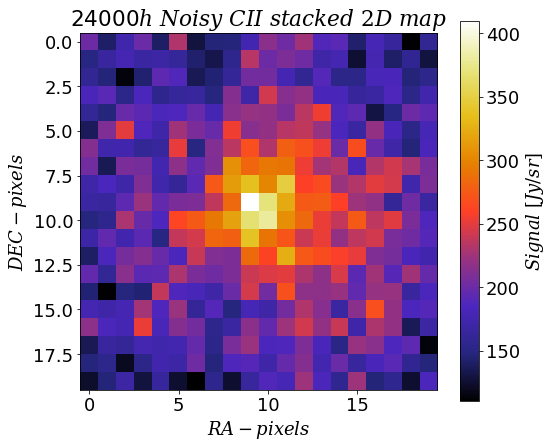

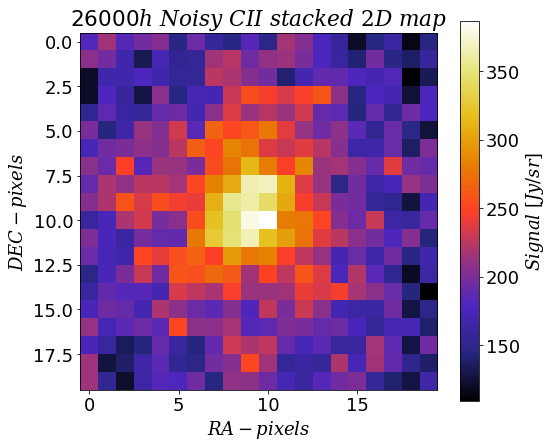

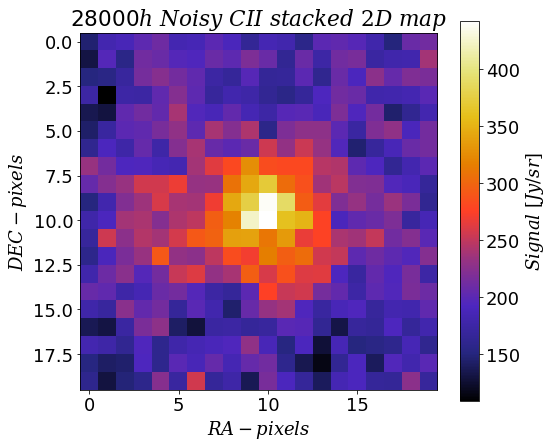

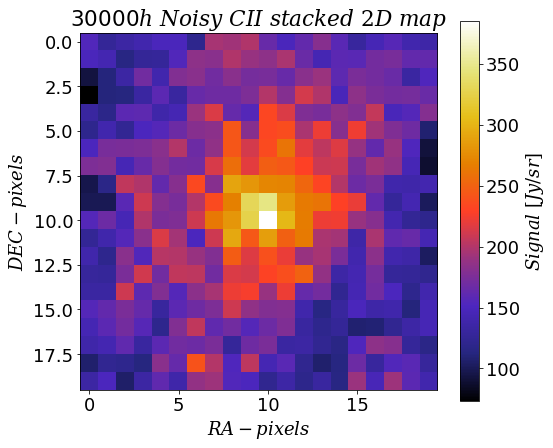

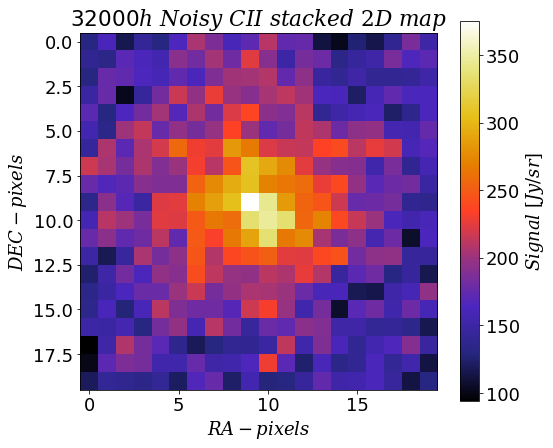

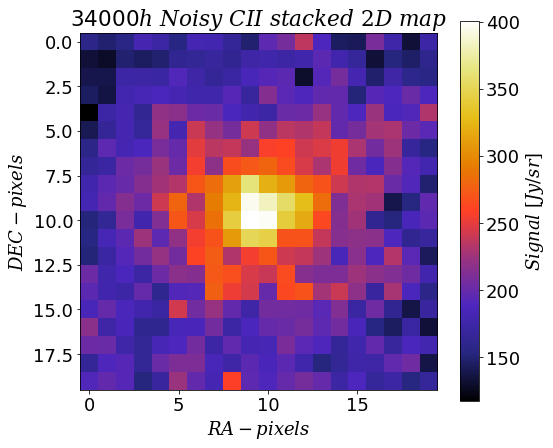

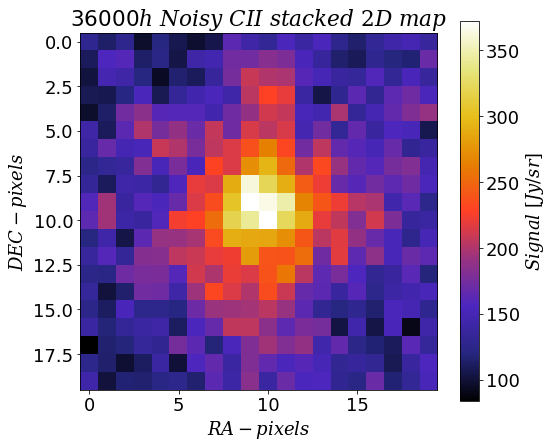

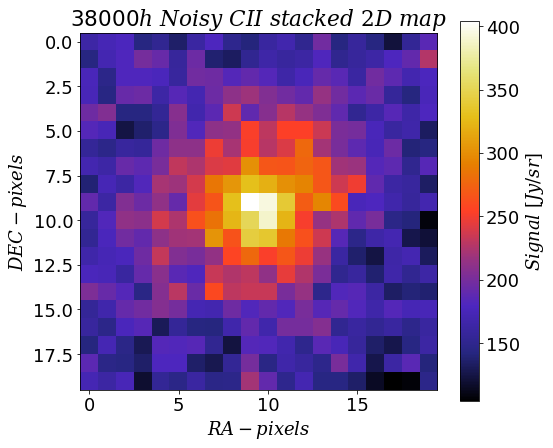

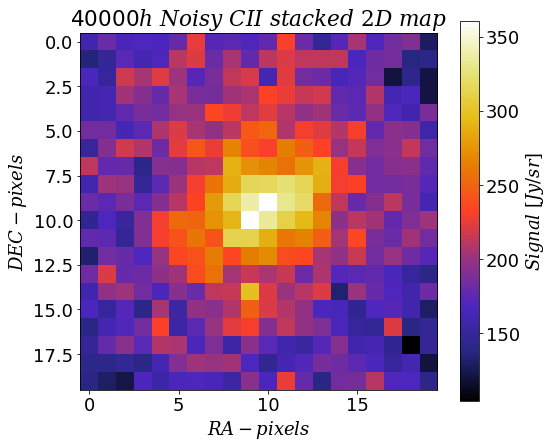

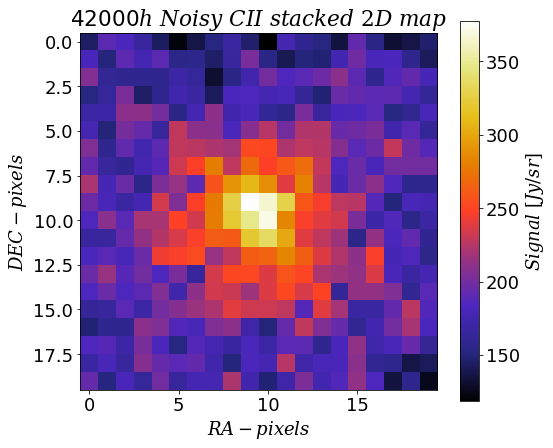

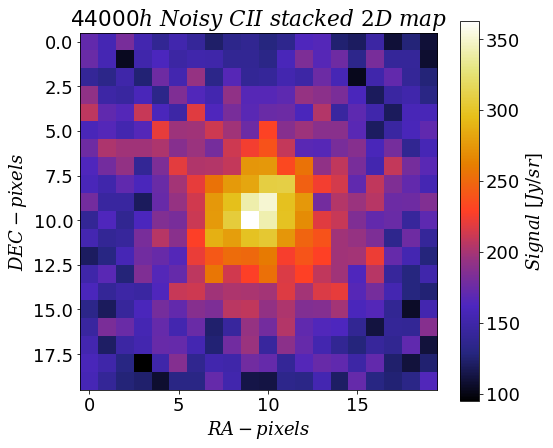

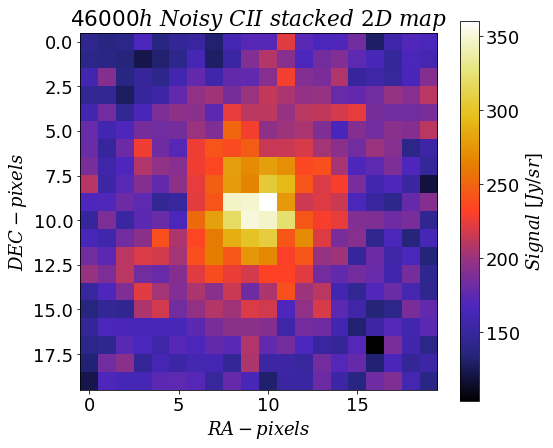

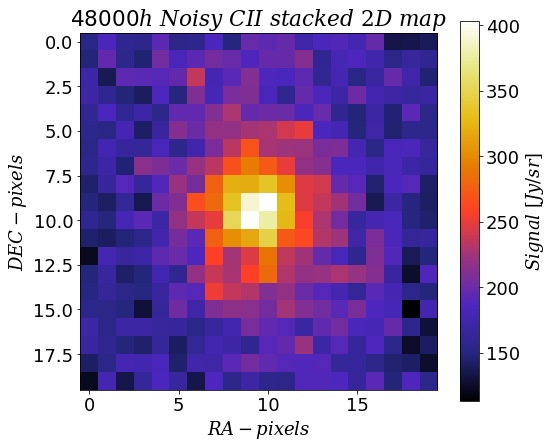

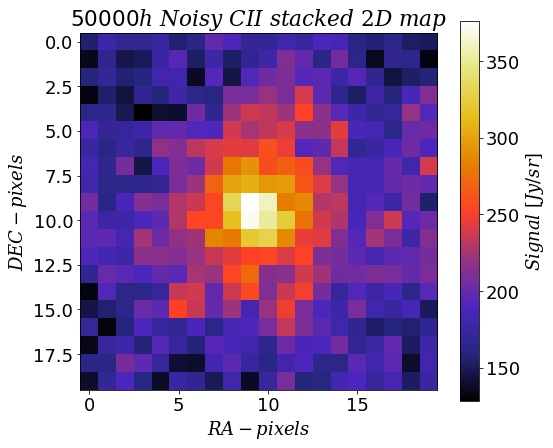

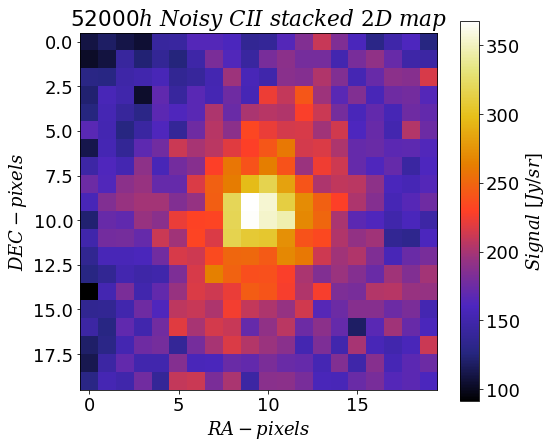

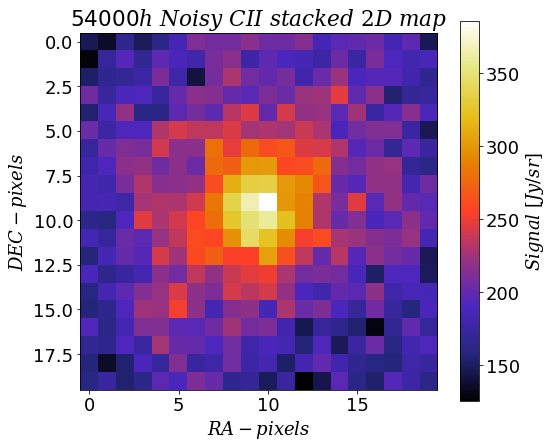

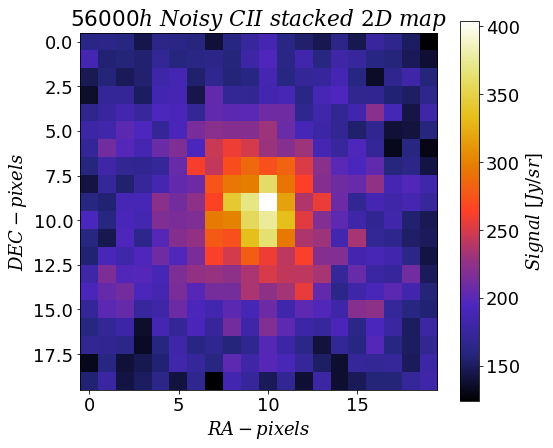

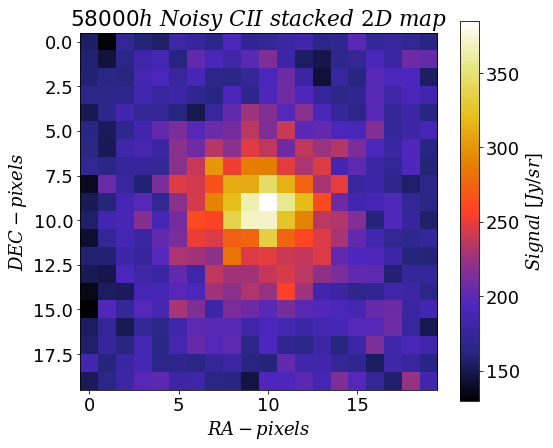

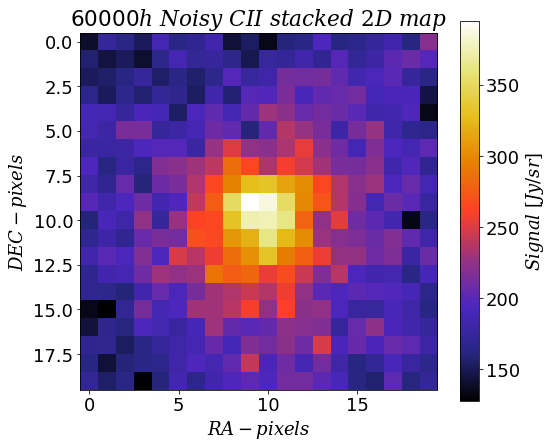

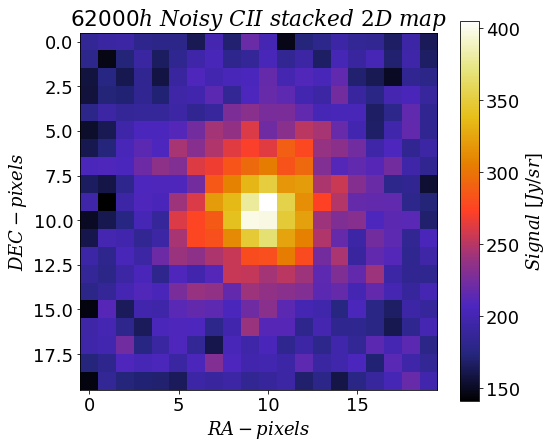

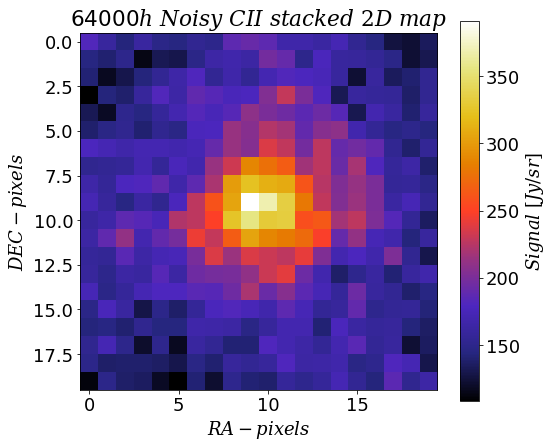

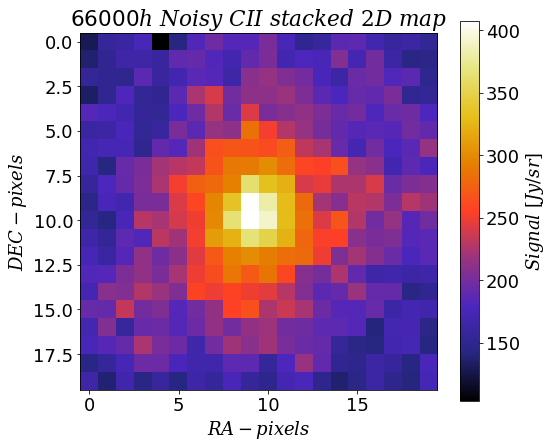

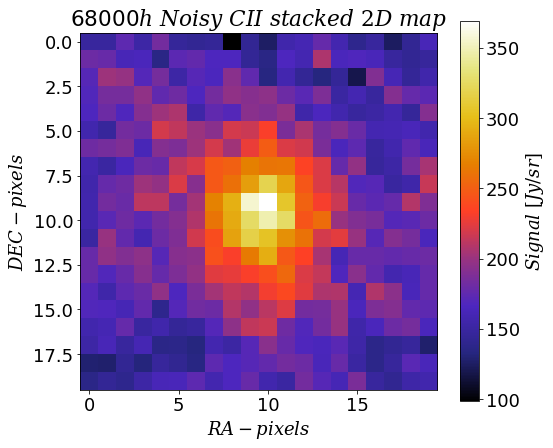

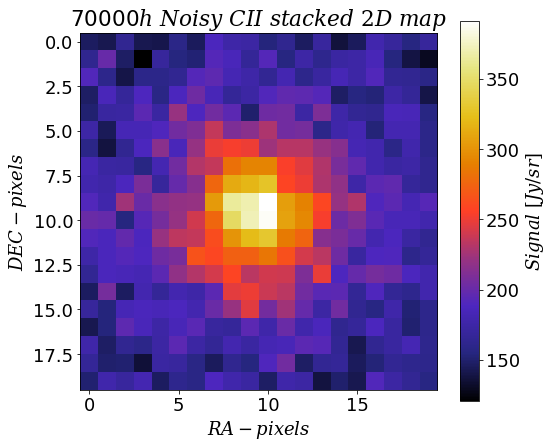

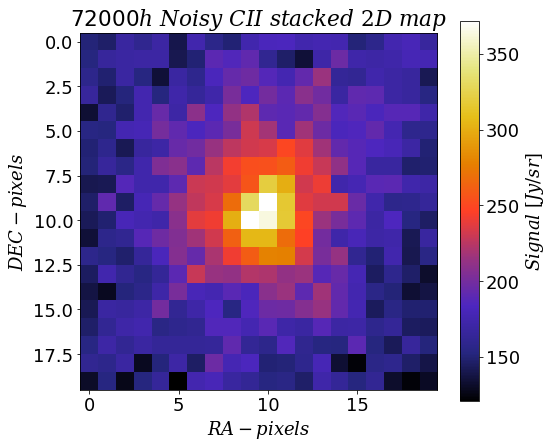

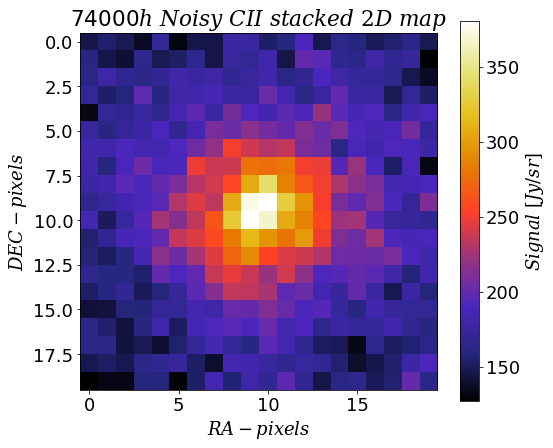

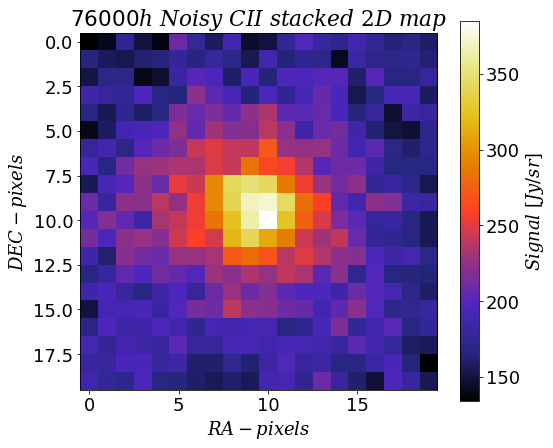

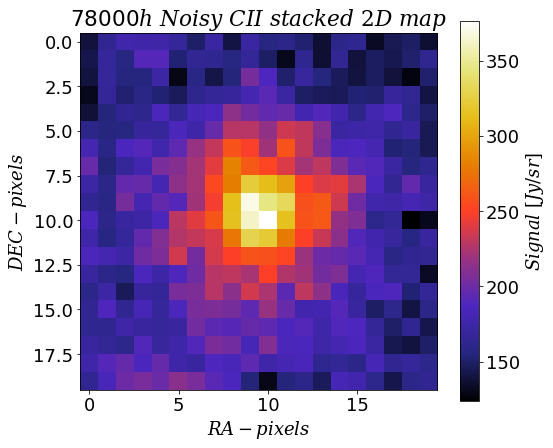

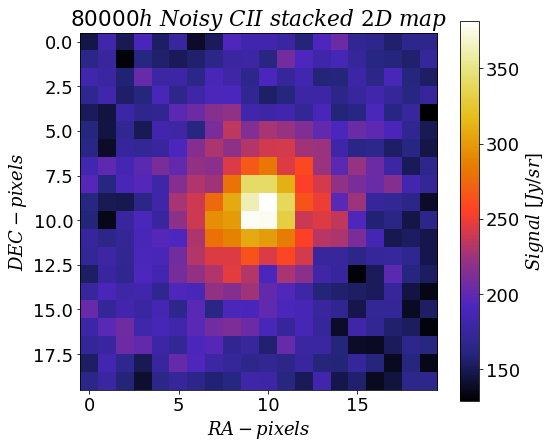

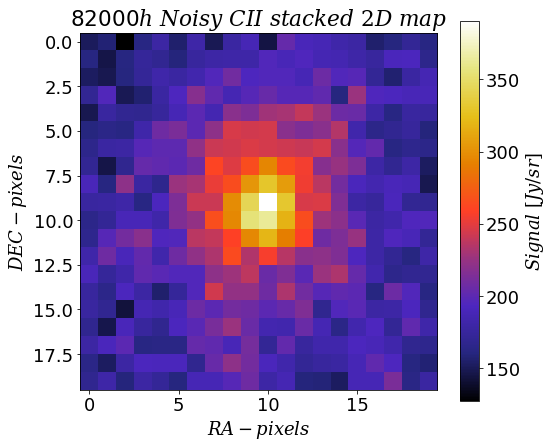

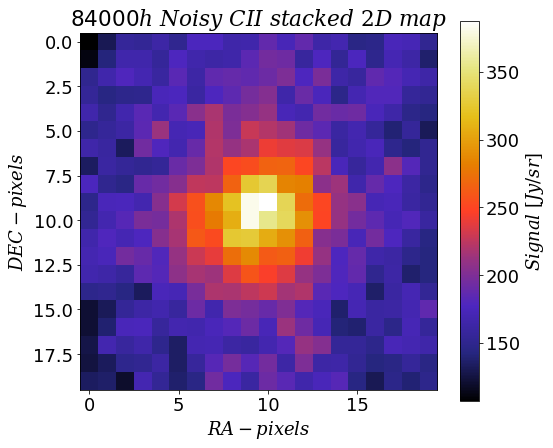

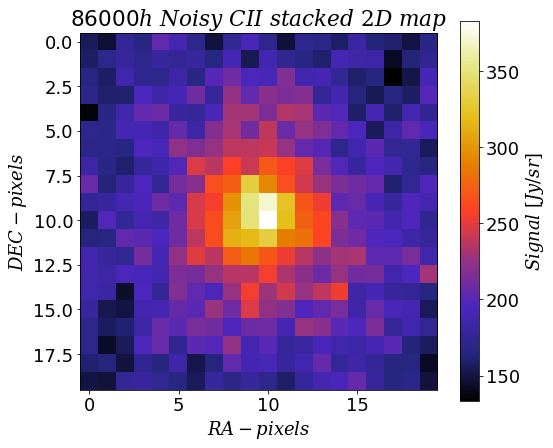

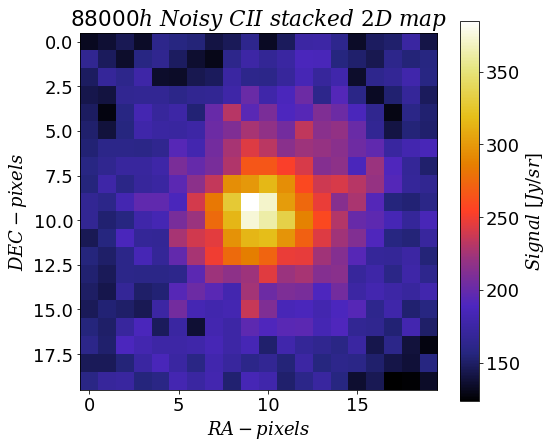

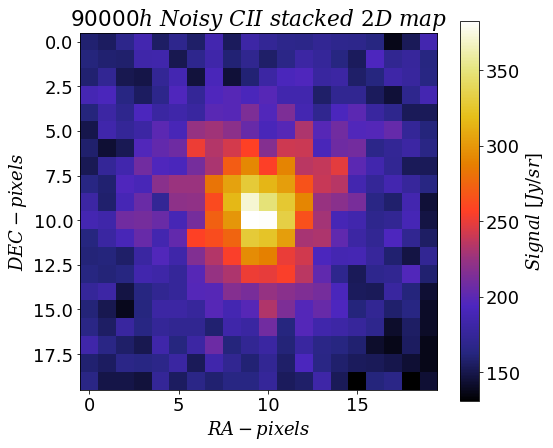

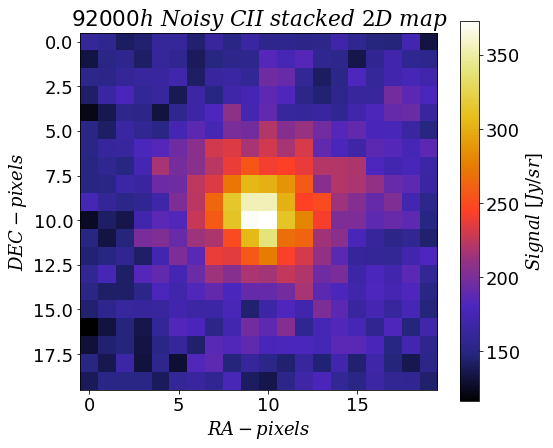

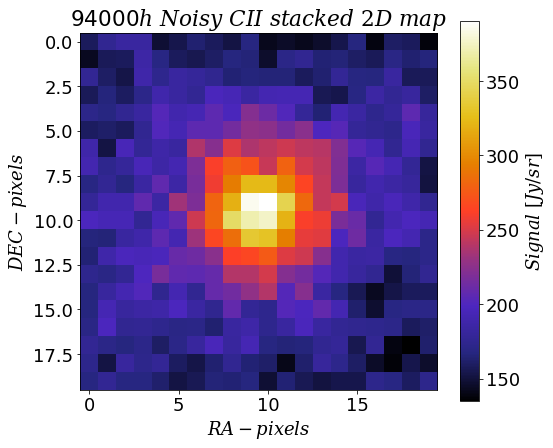

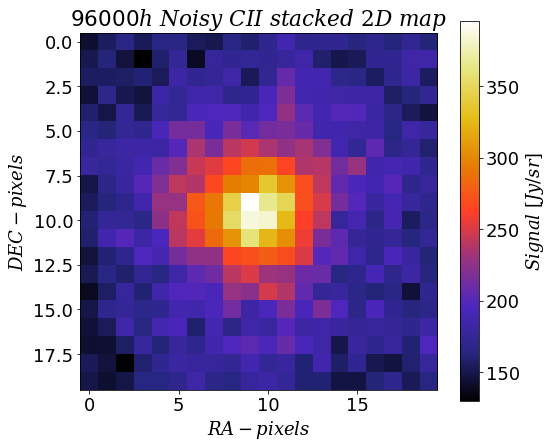

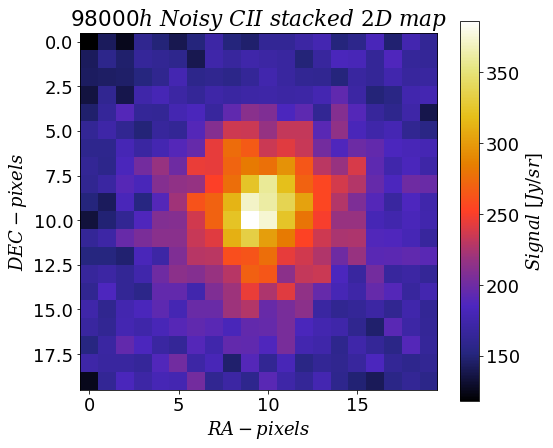

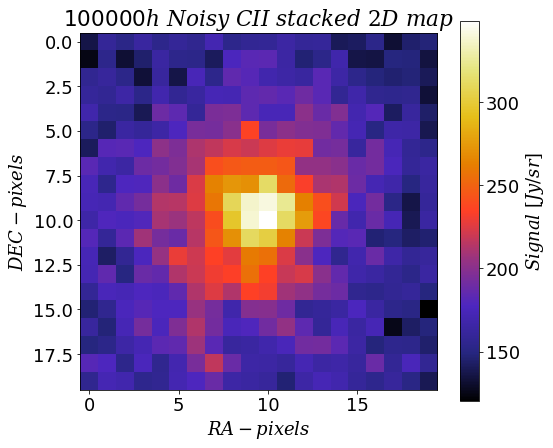

In [138]:
for i in range(len(t_obs_arr)):

    plt.imshow(np.nanmean(noisy_tot_mov[i], axis = 0), cmap = 'CMRmap')
    cb = plt.colorbar()
    cb.set_label(label = r'$Signal\ [Jy/sr]$', math_fontfamily = 'dejavuserif')
    plt.title(str(round(t_obs_arr[i]))+r'$h\ Noisy\ CII\ stacked\ 2D\ map$', math_fontfamily = 'dejavuserif')
    plt.xlabel(r'$RA-pixels$', math_fontfamily='dejavuserif')
    plt.ylabel(r'$DEC-pixels$', math_fontfamily='dejavuserif')
    
    #plt.savefig('/snaps/'+str(i)+'.png')
    plt.show()

/tmp/ipykernel_4043815/639269069.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))


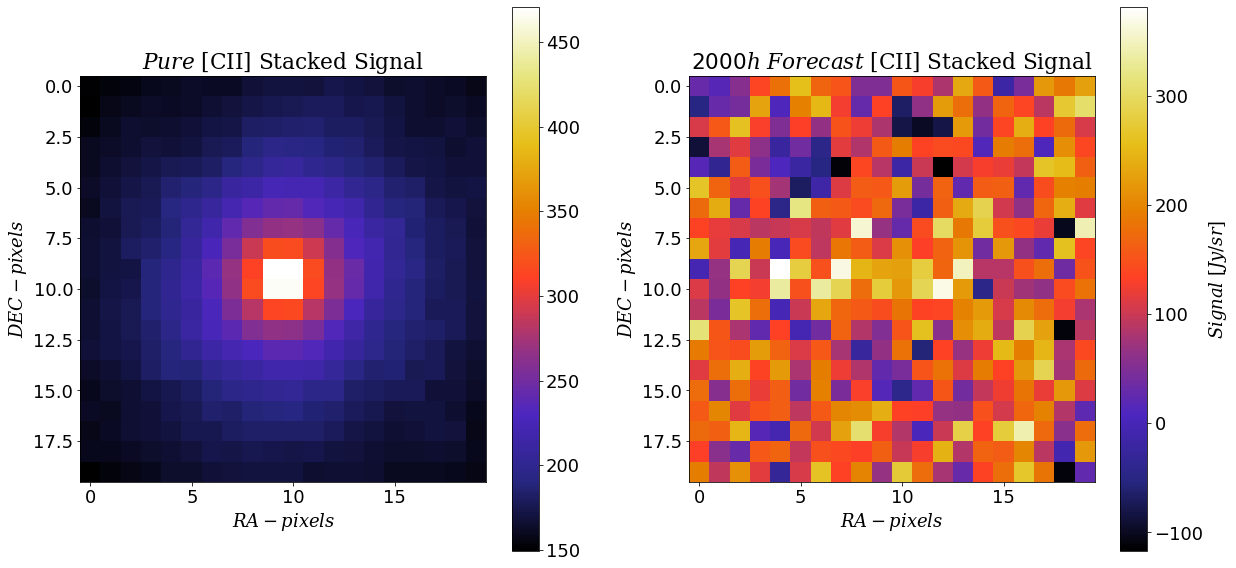

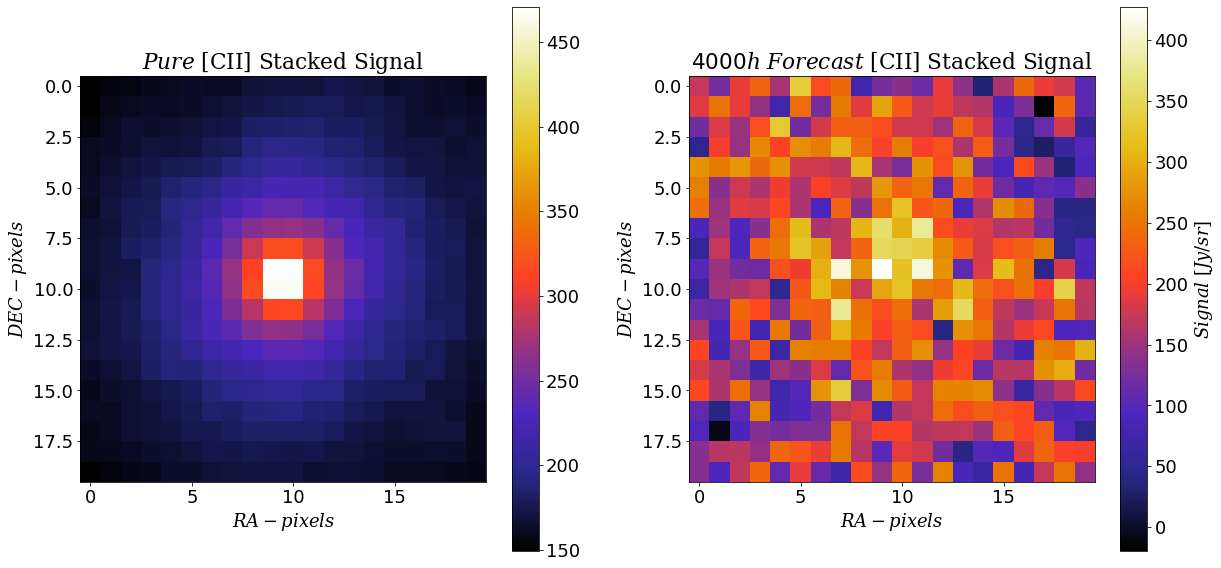

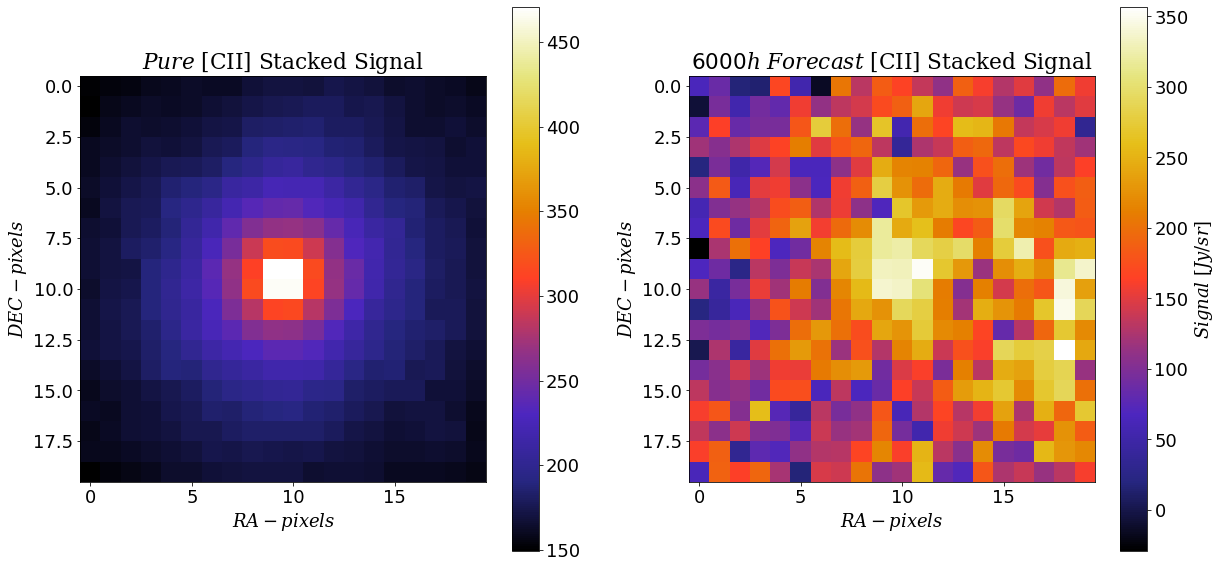

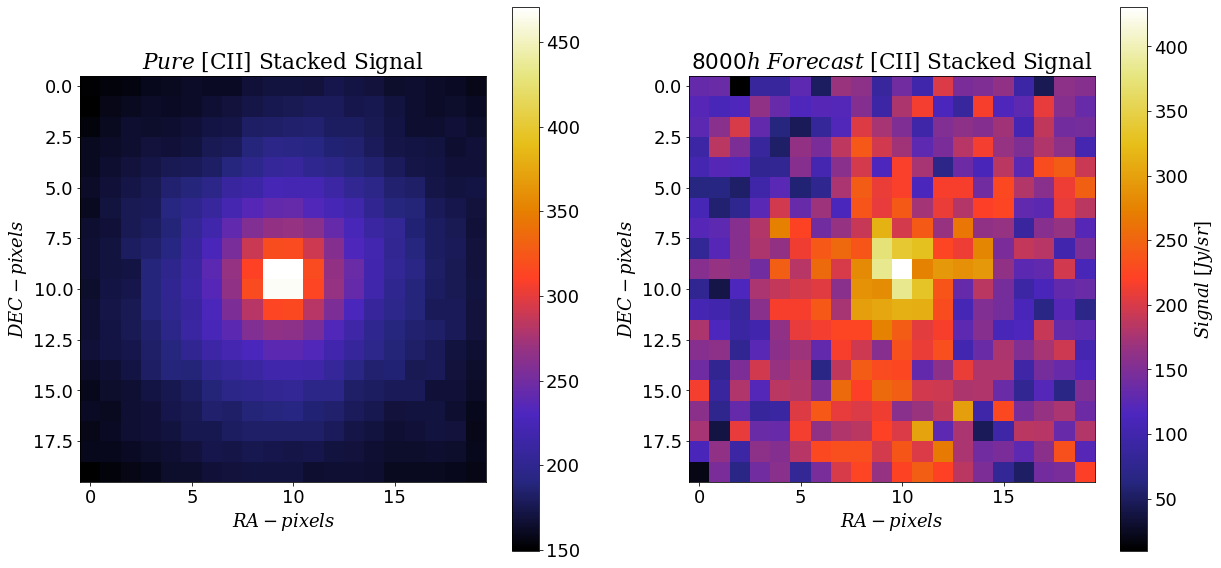

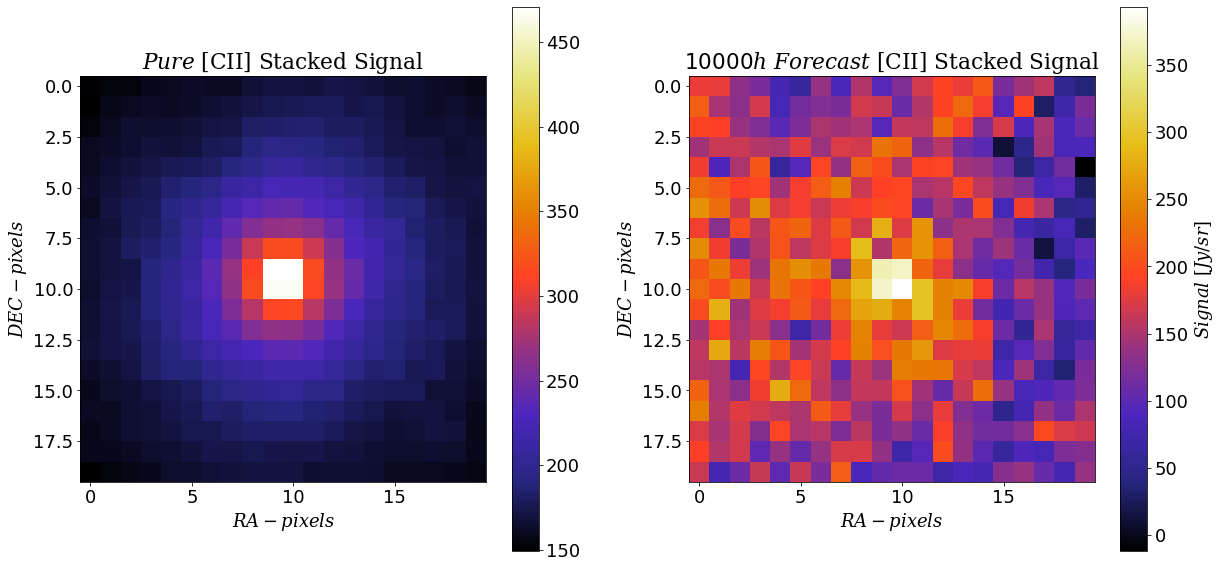

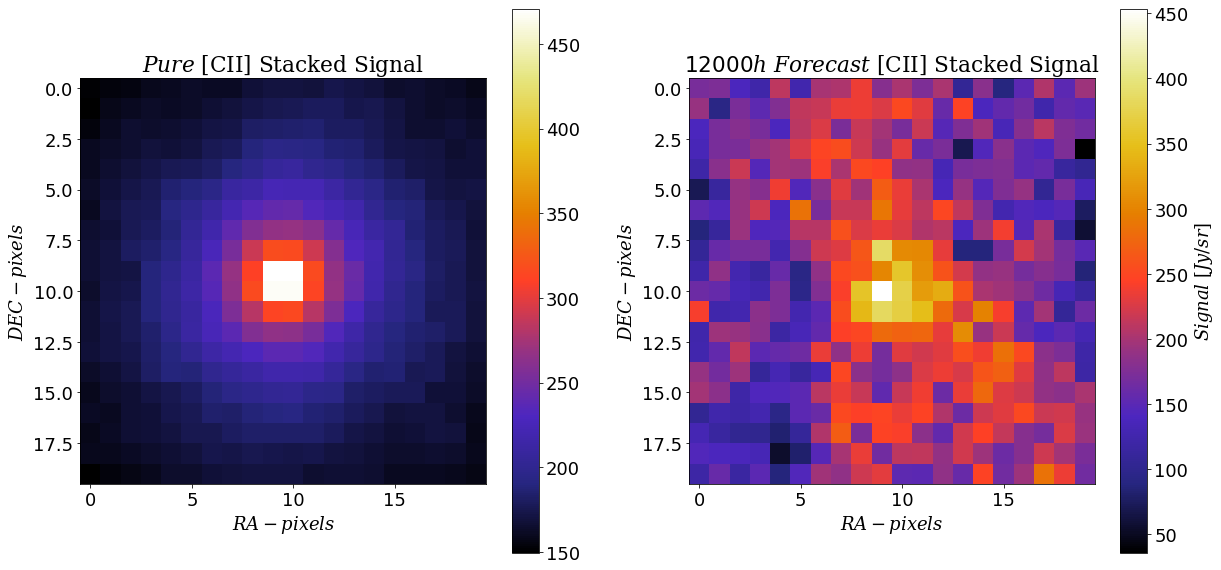

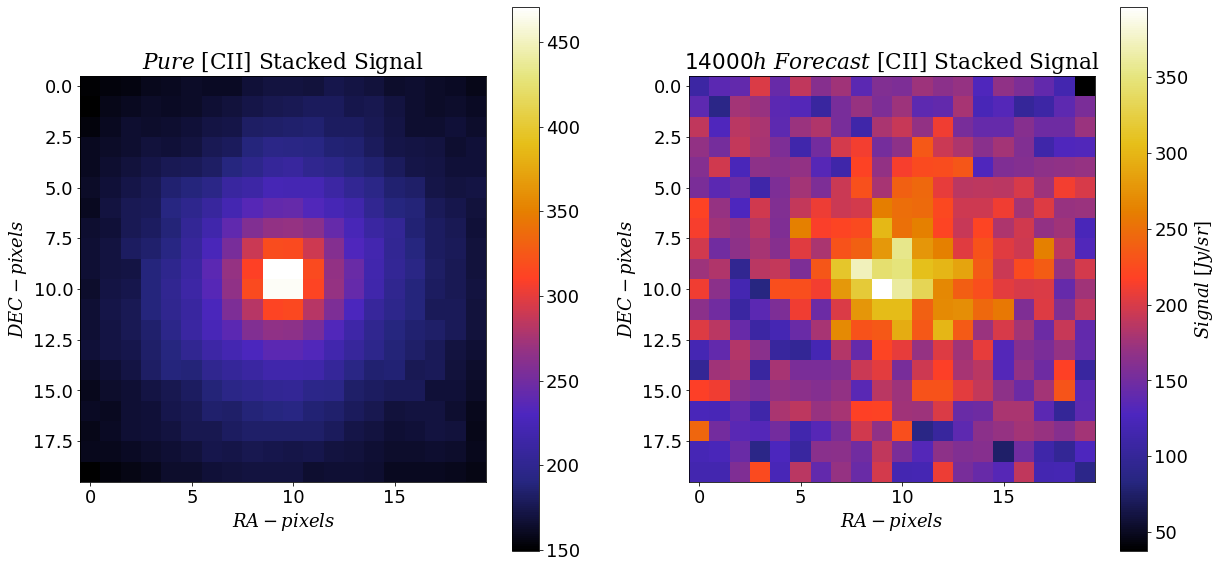

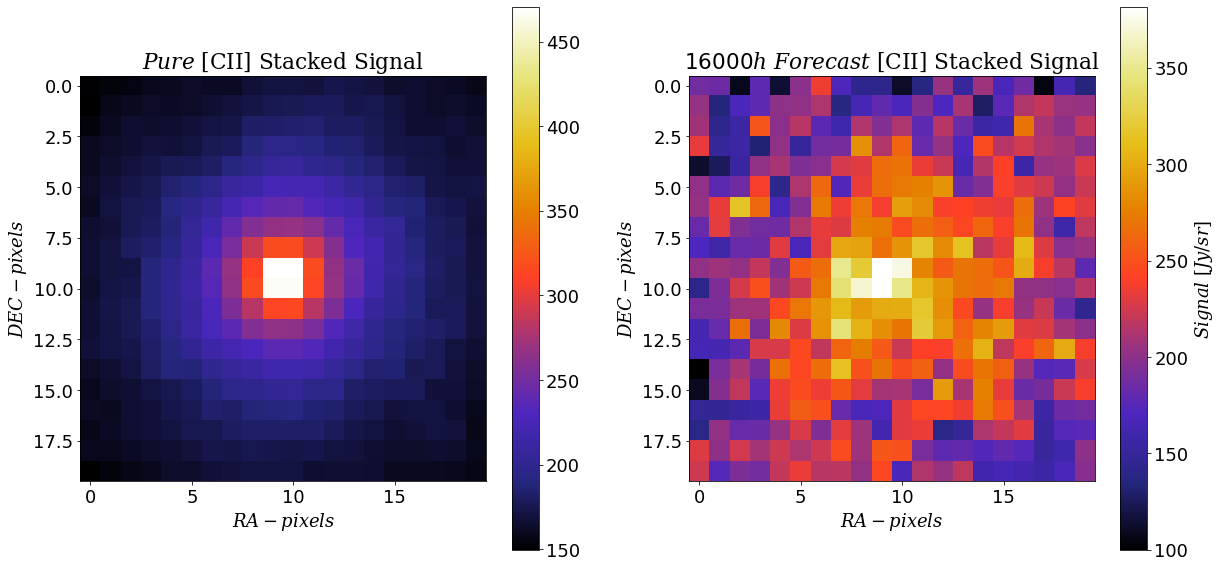

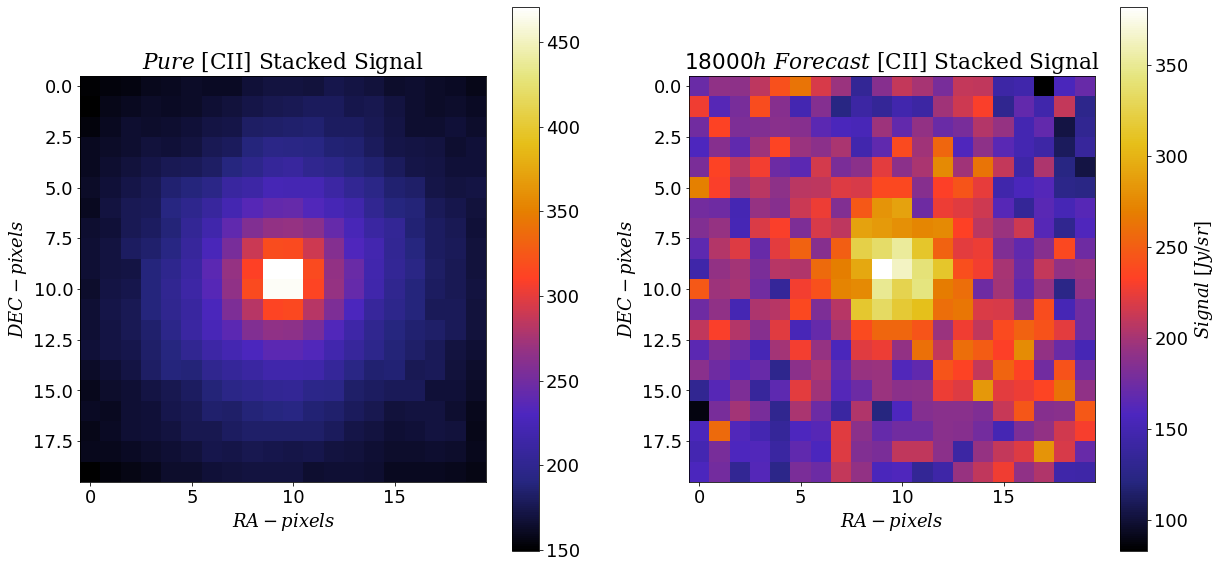

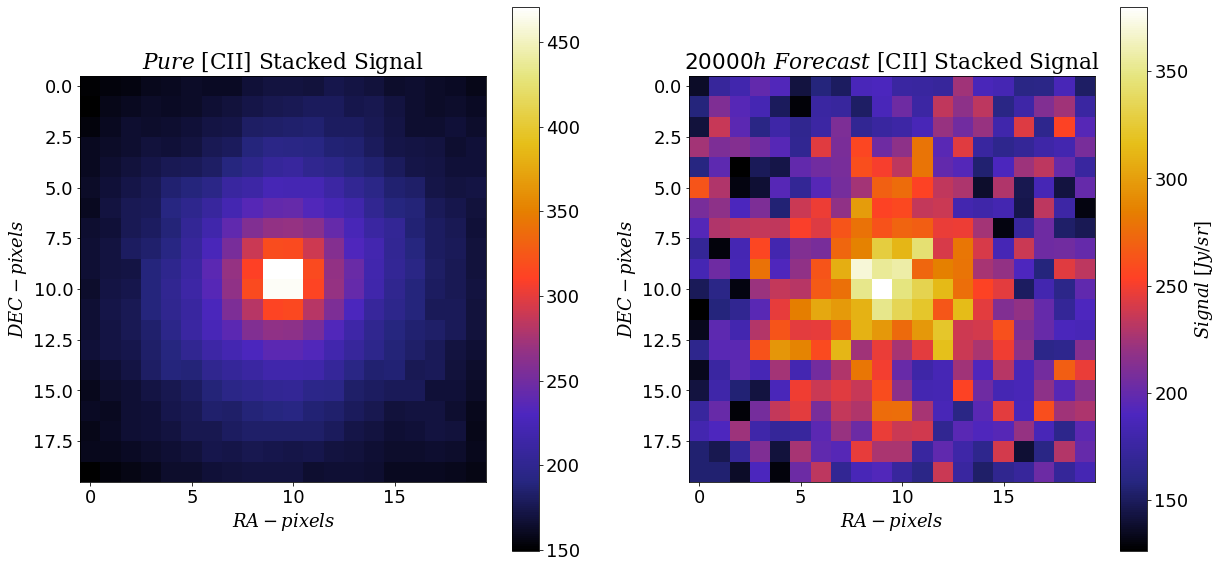

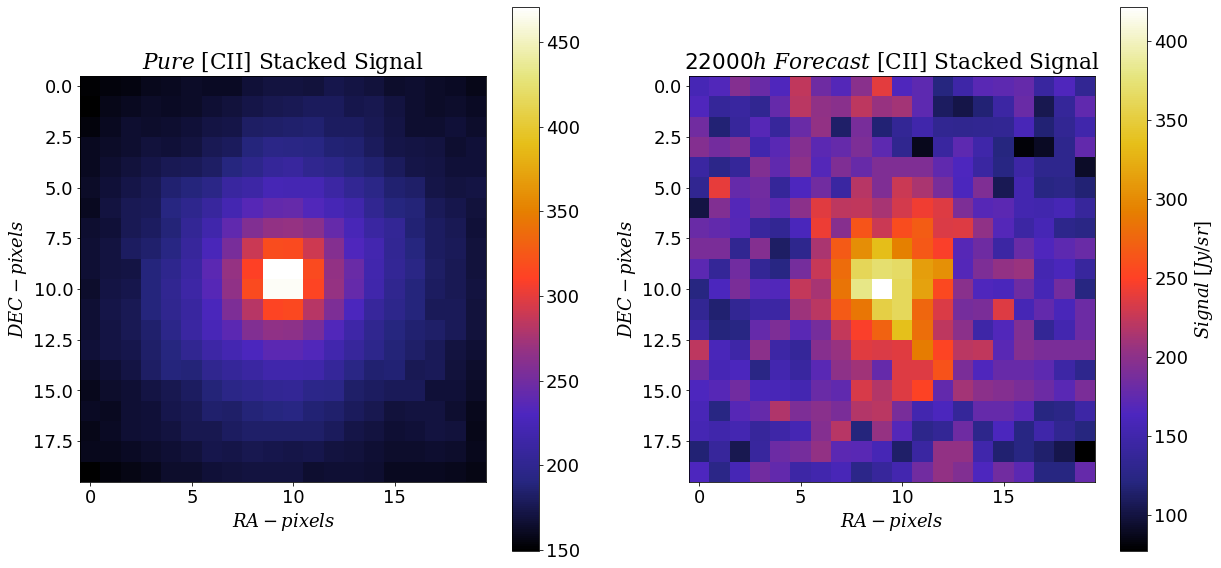

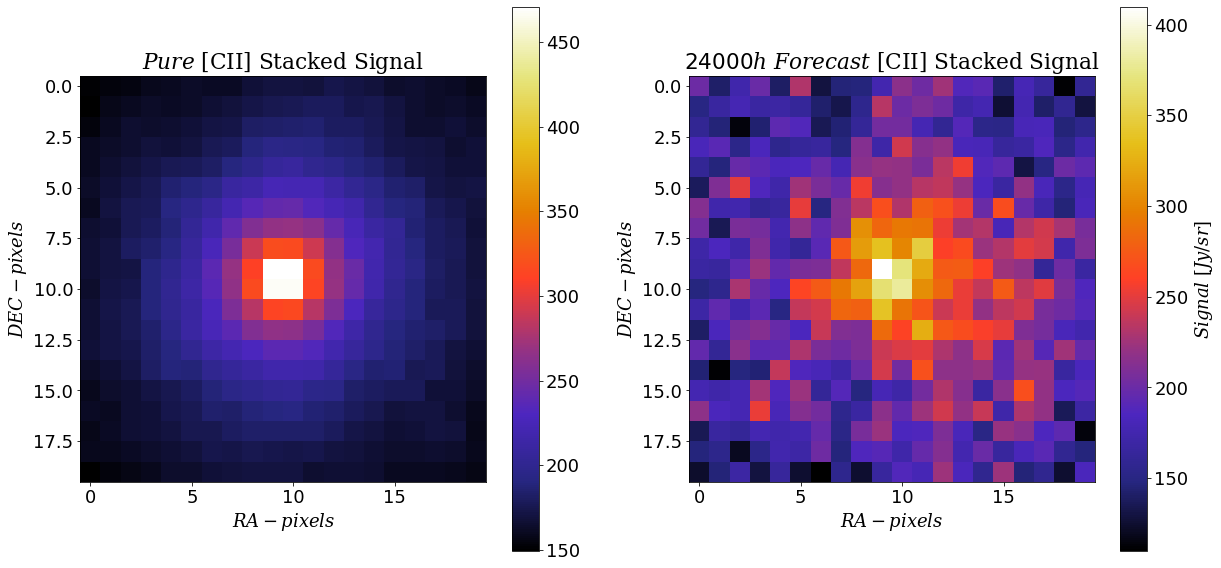

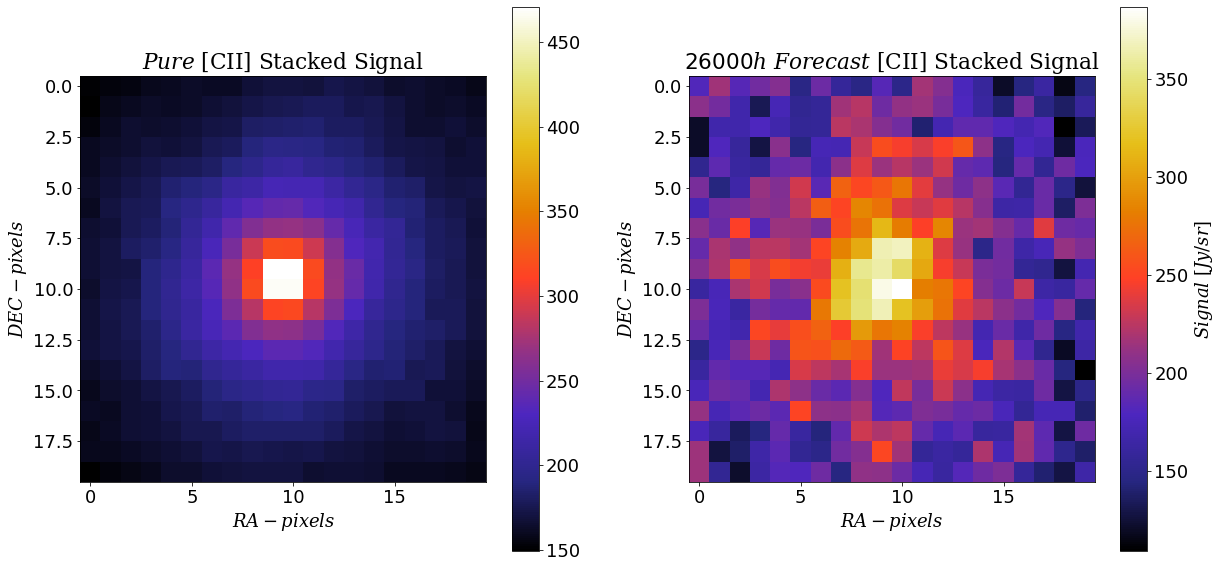

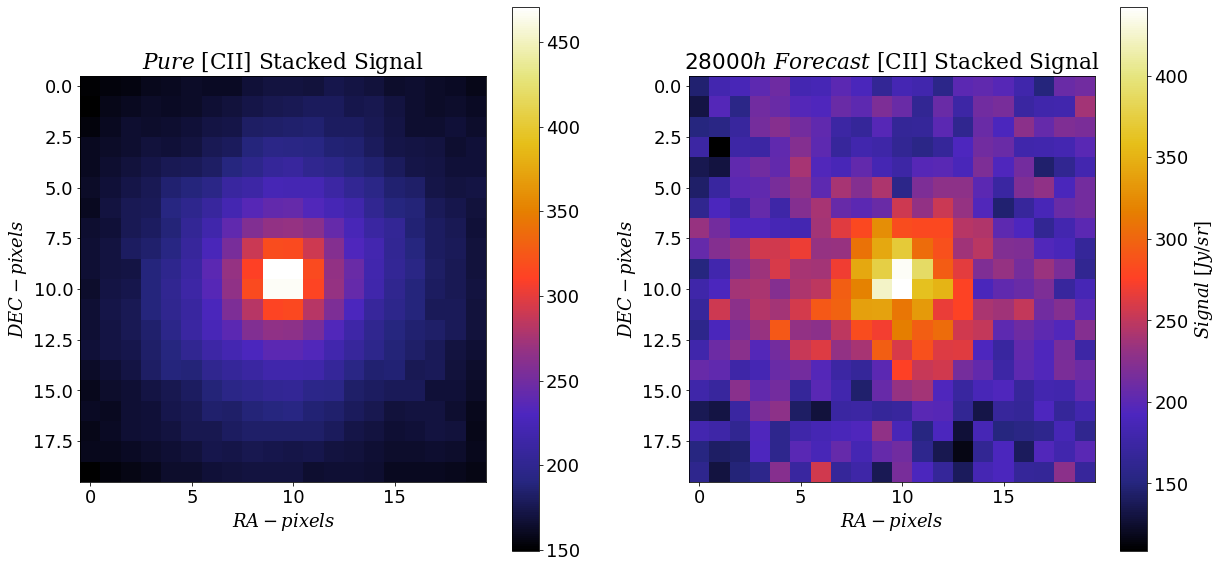

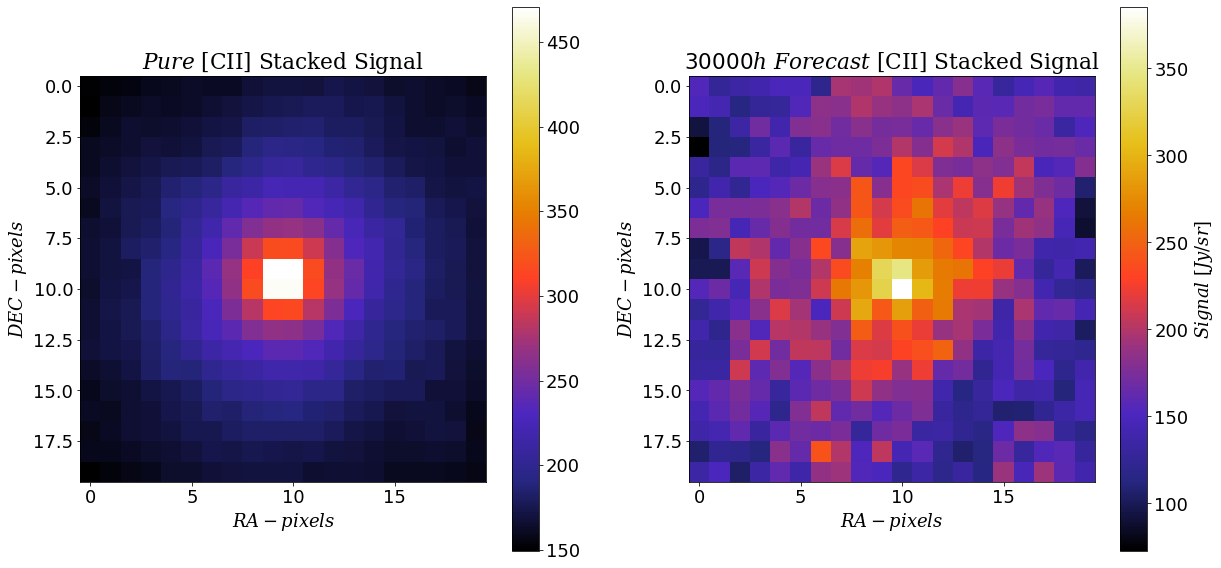

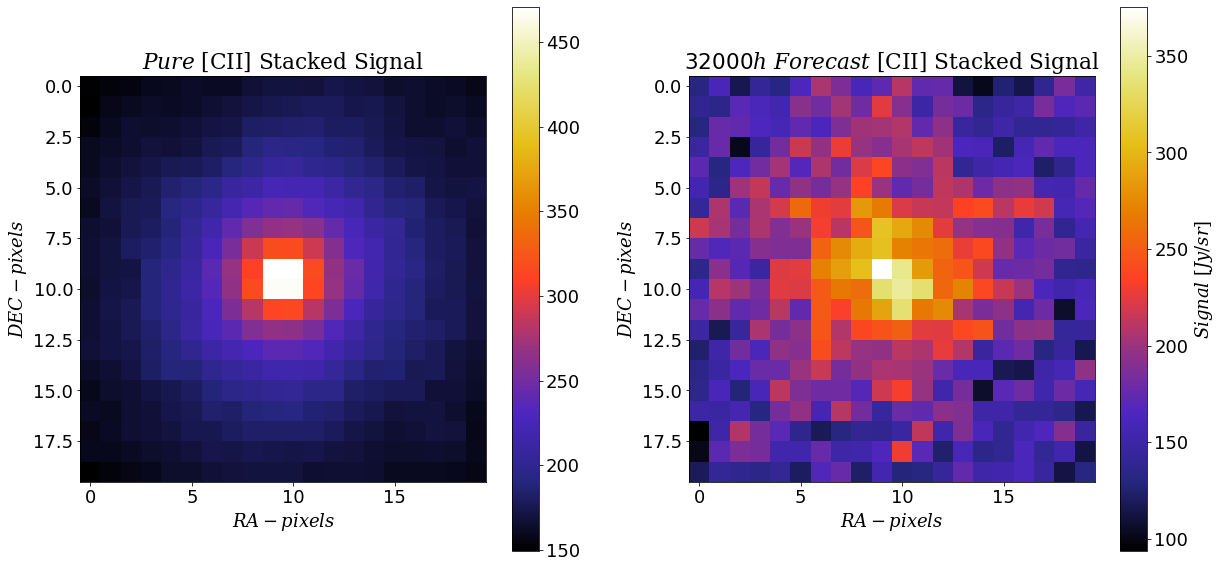

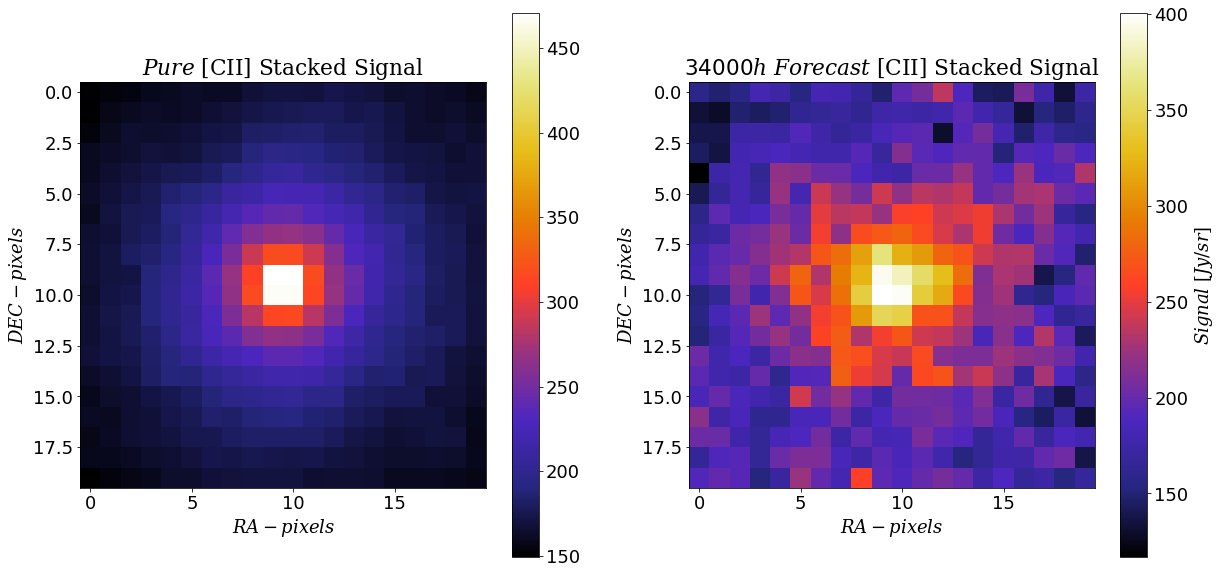

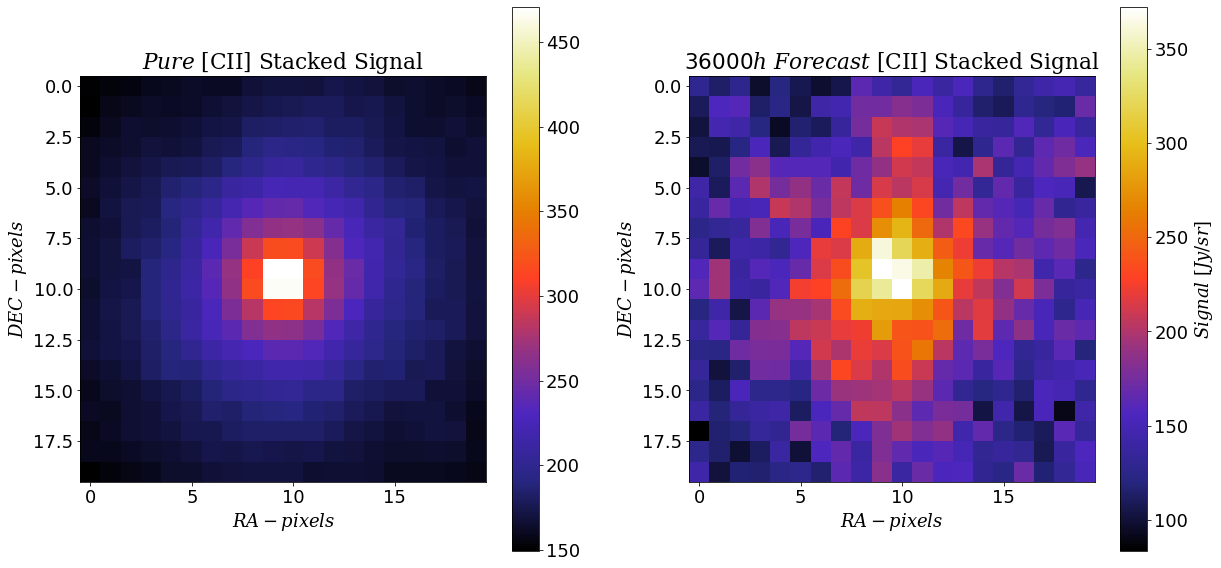

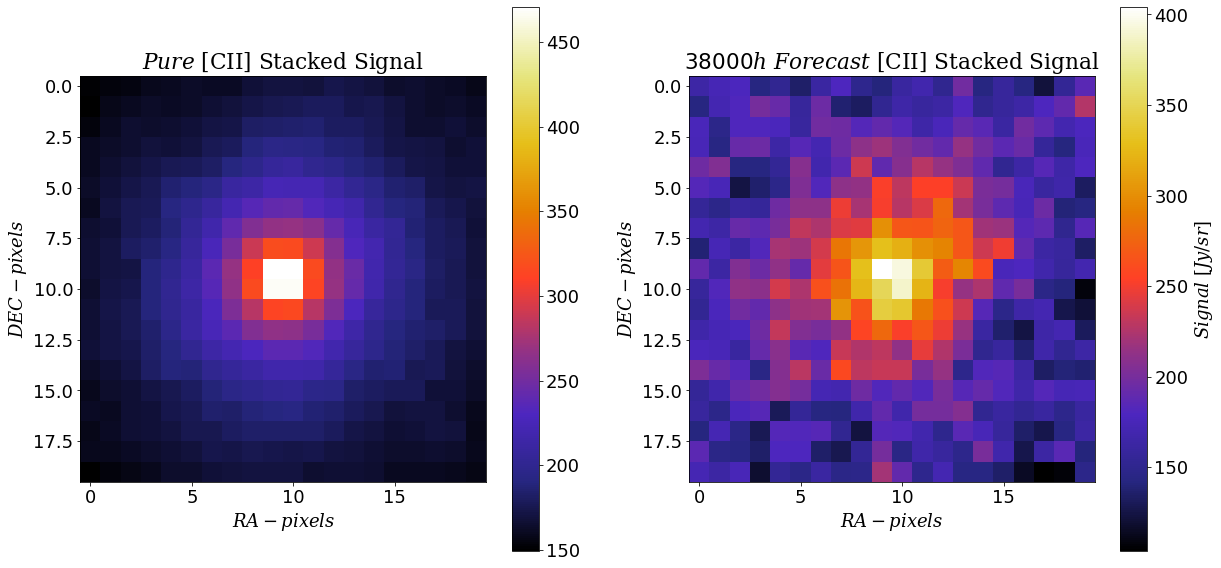

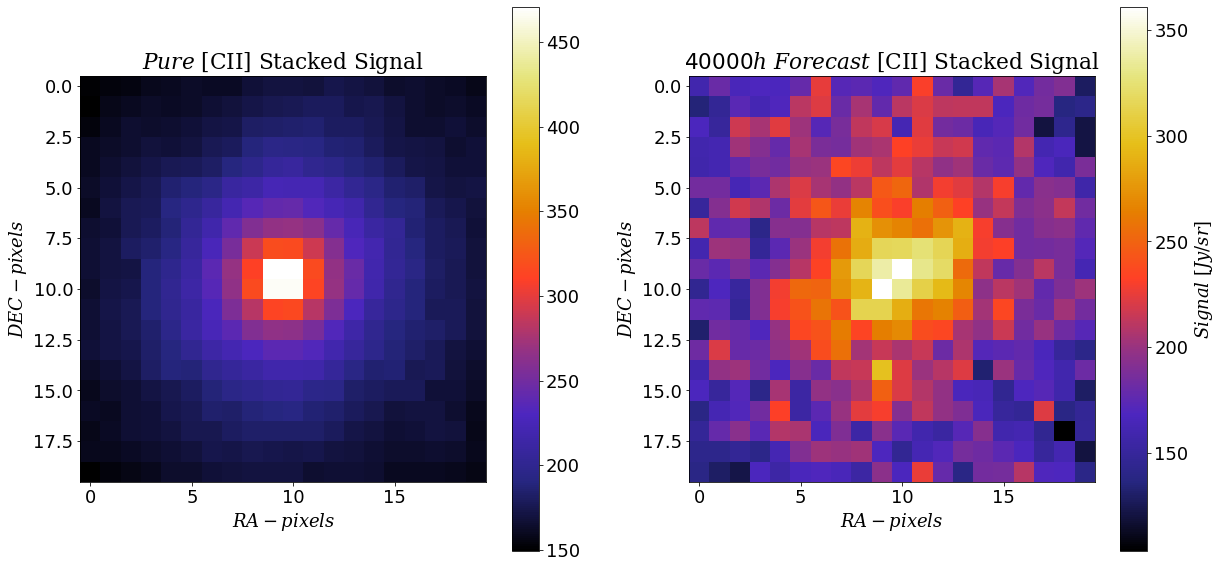

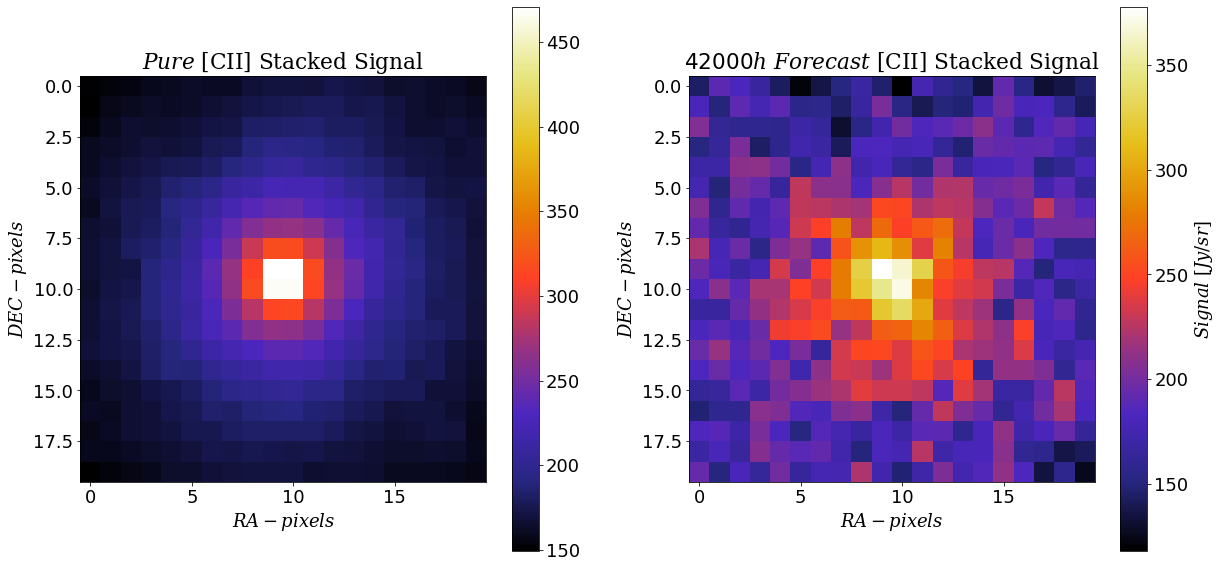

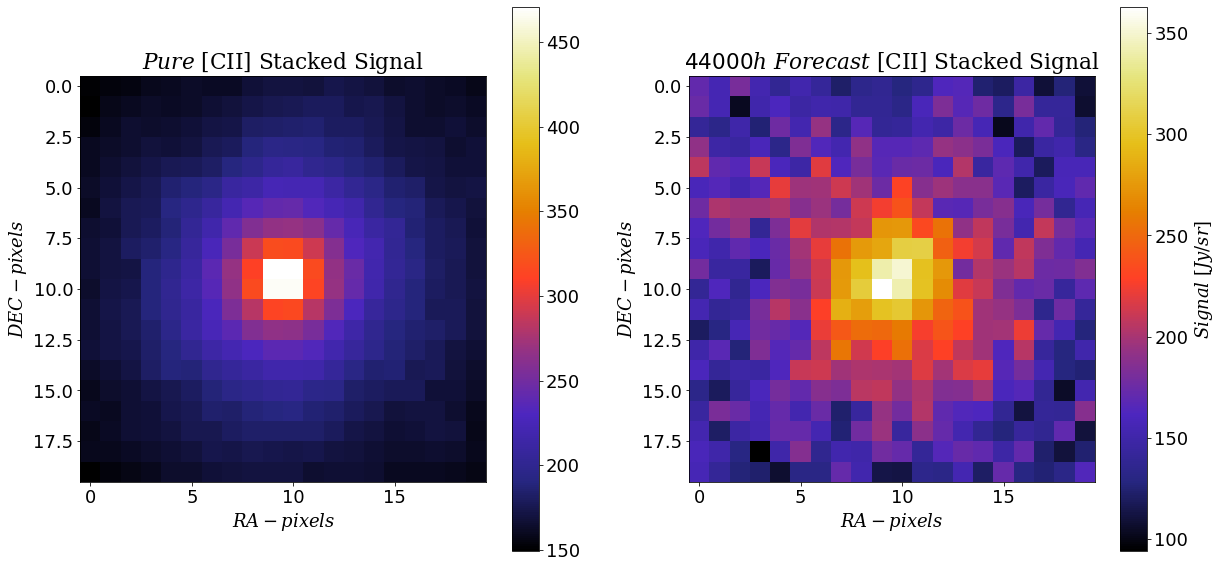

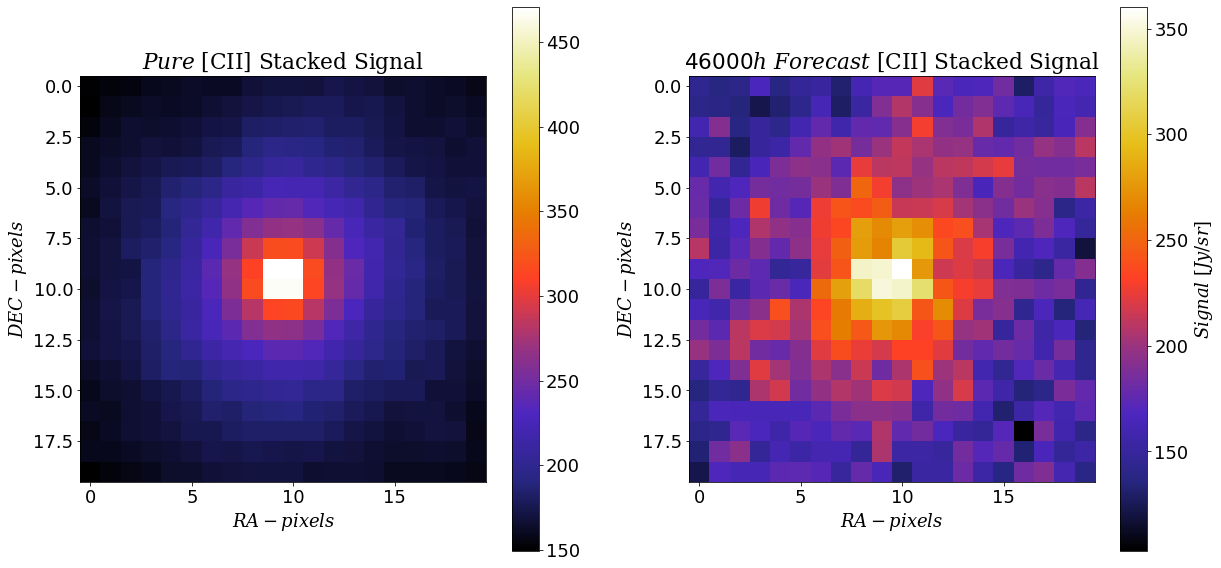

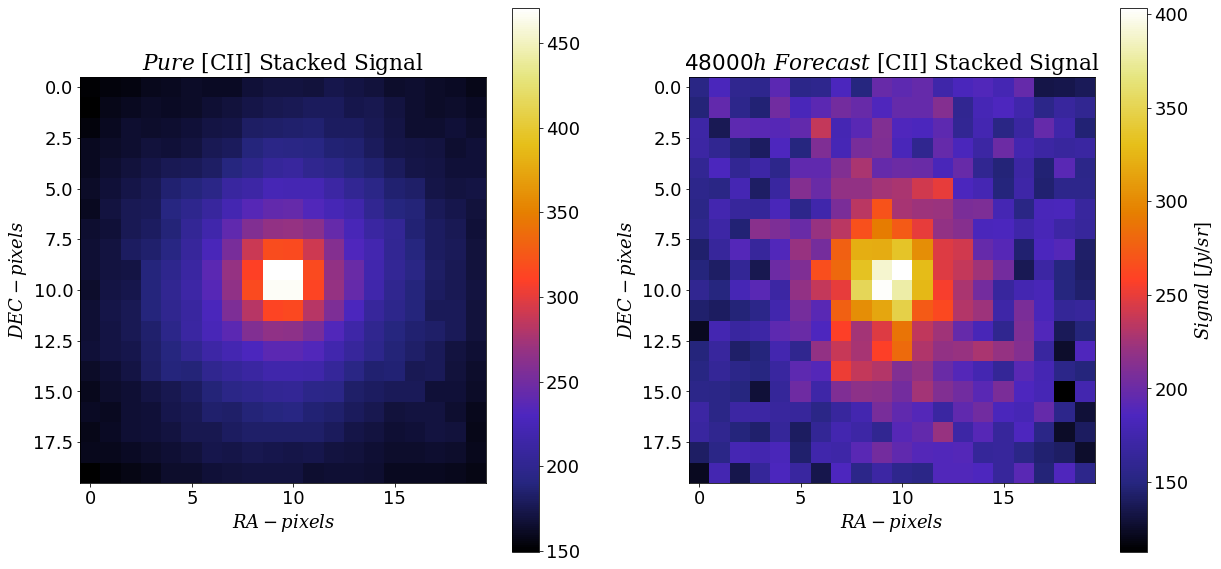

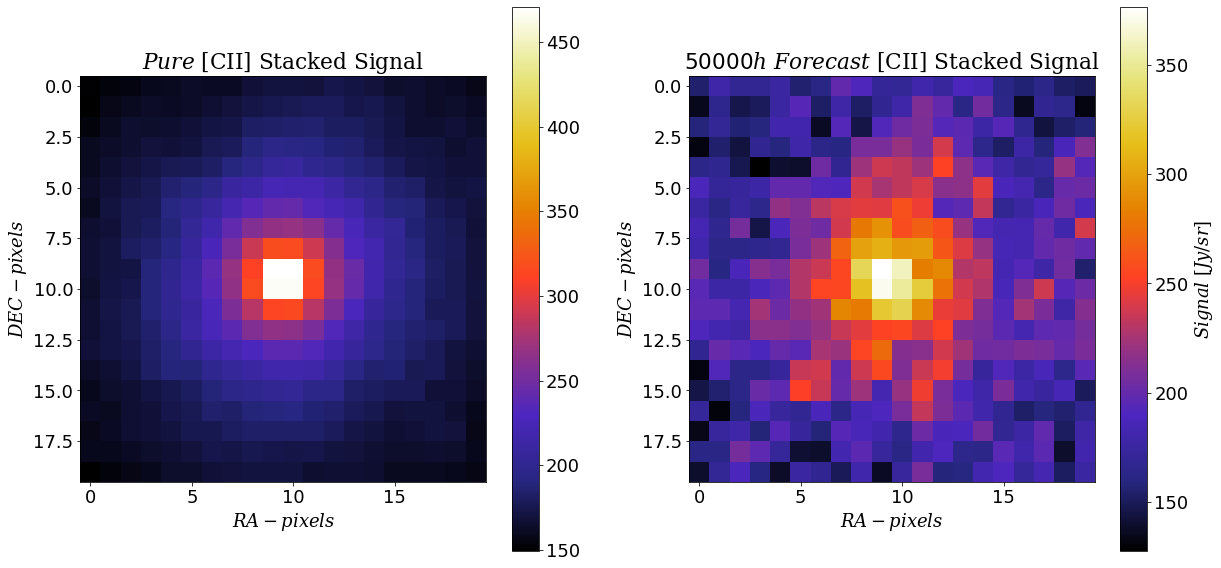

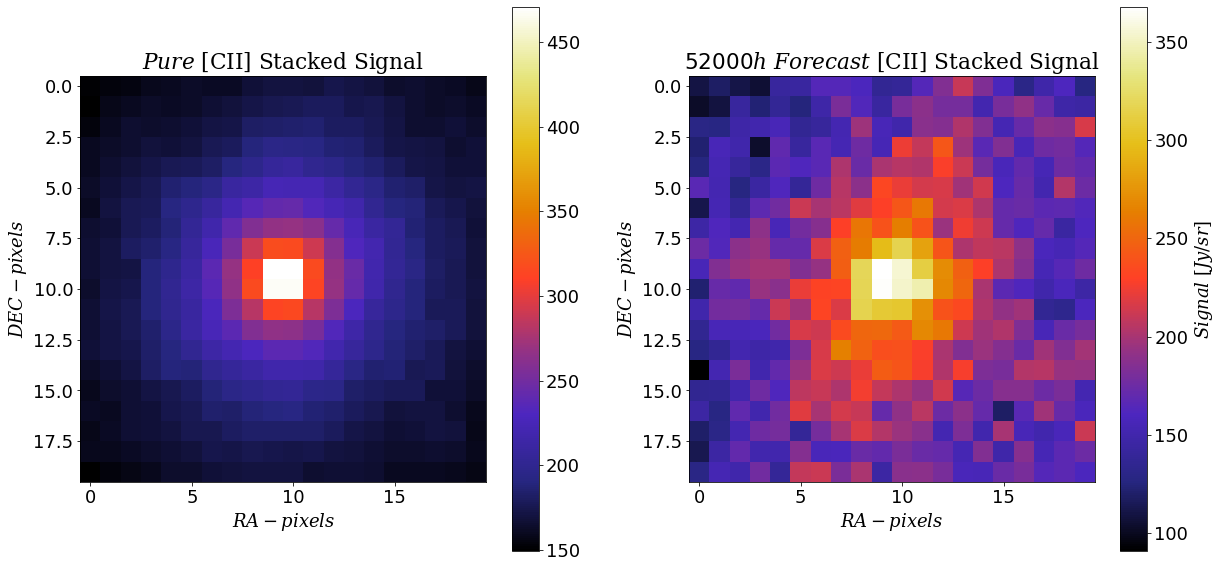

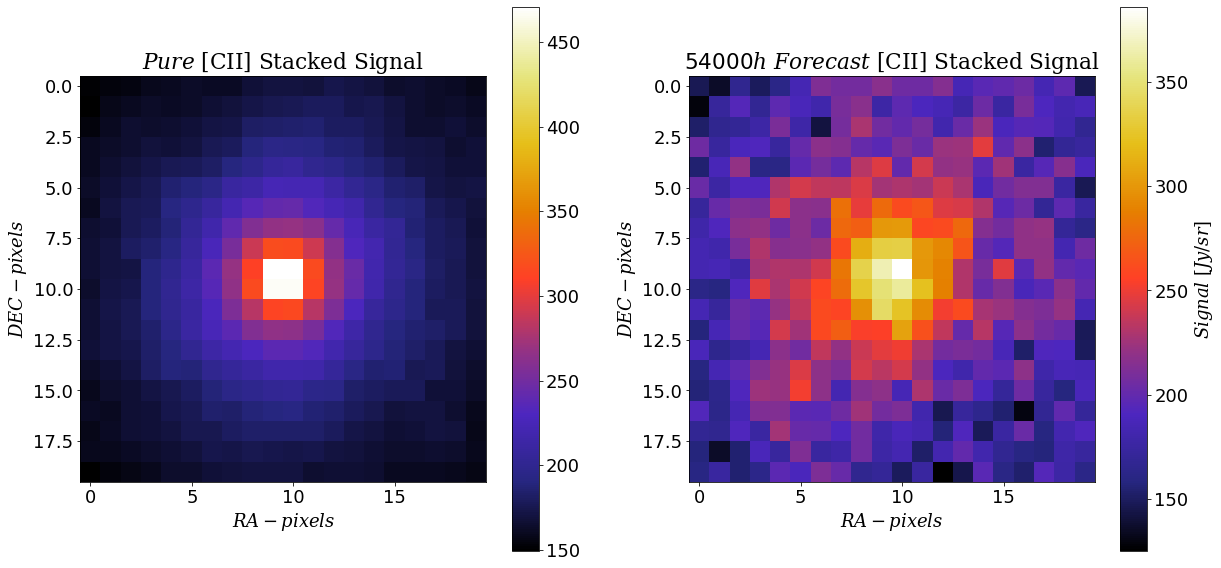

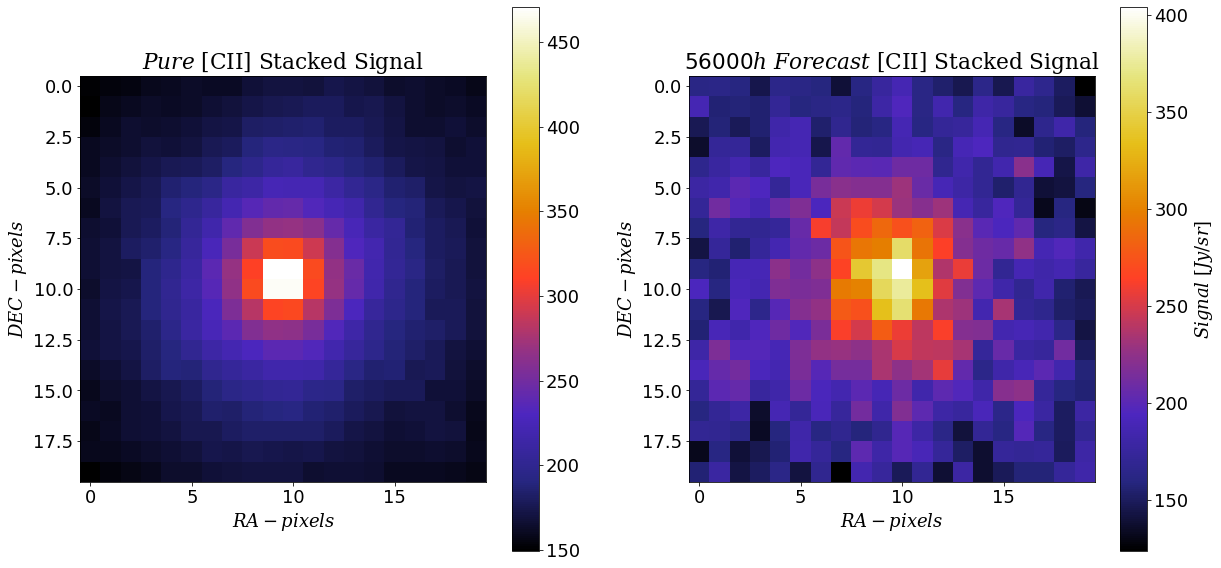

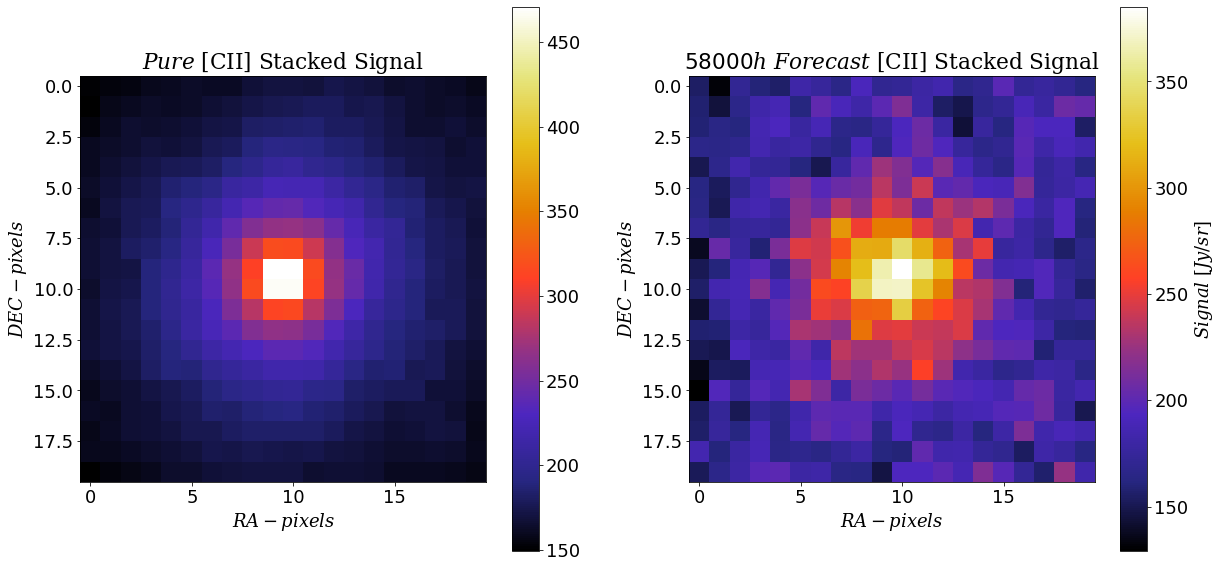

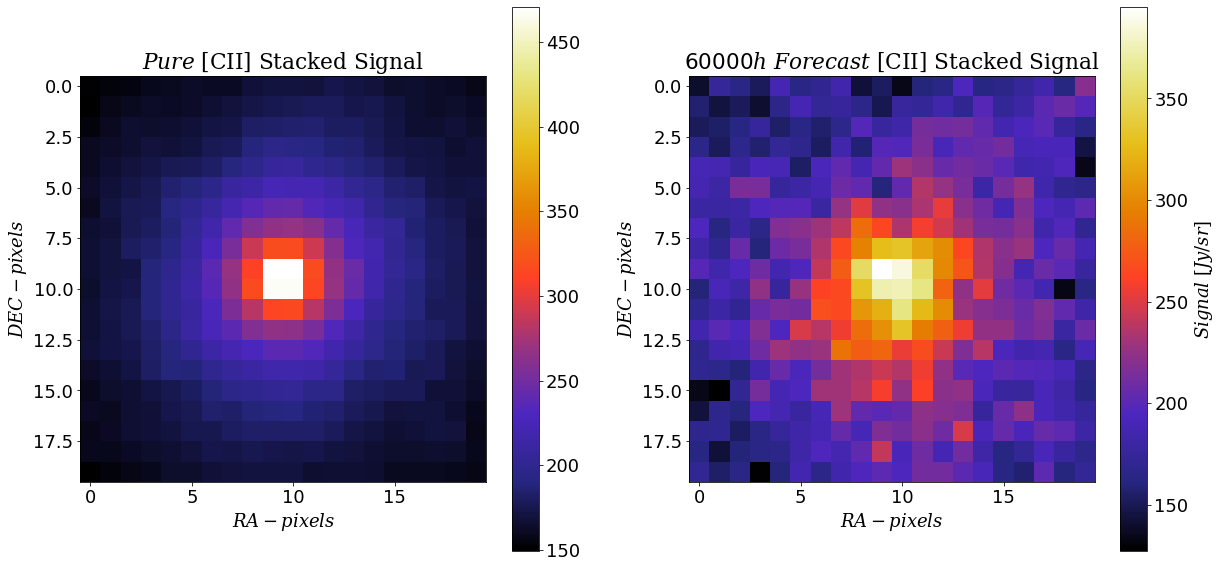

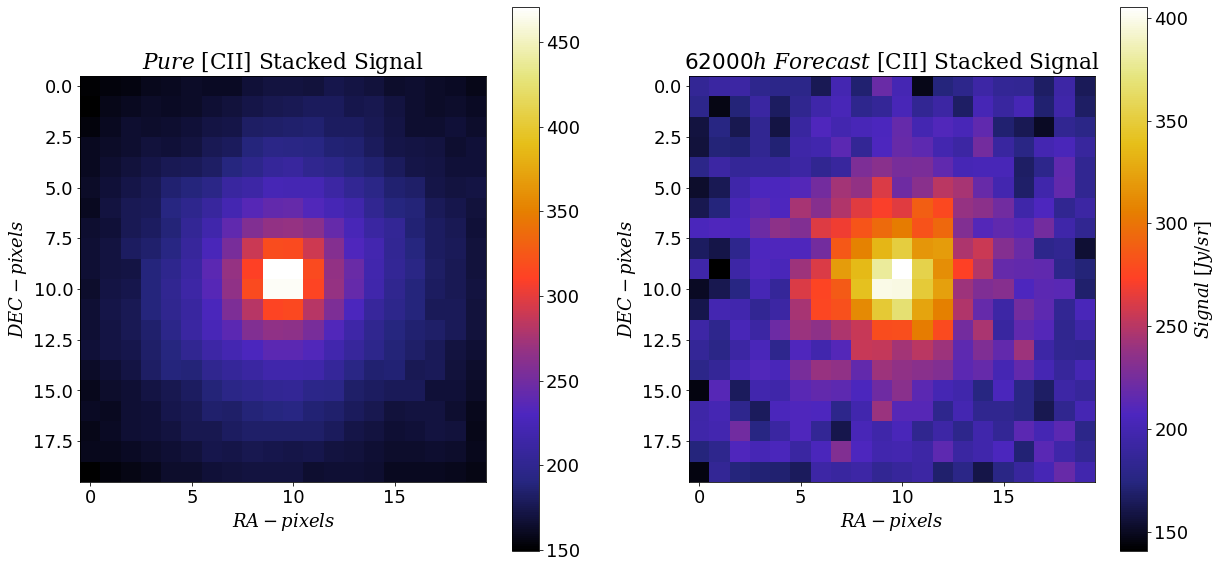

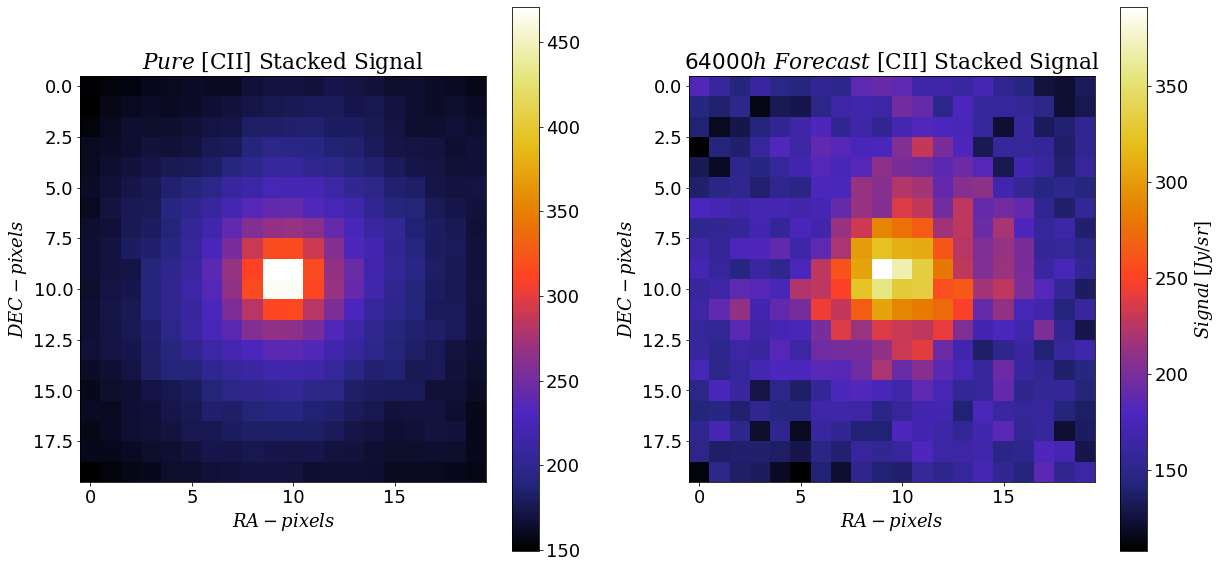

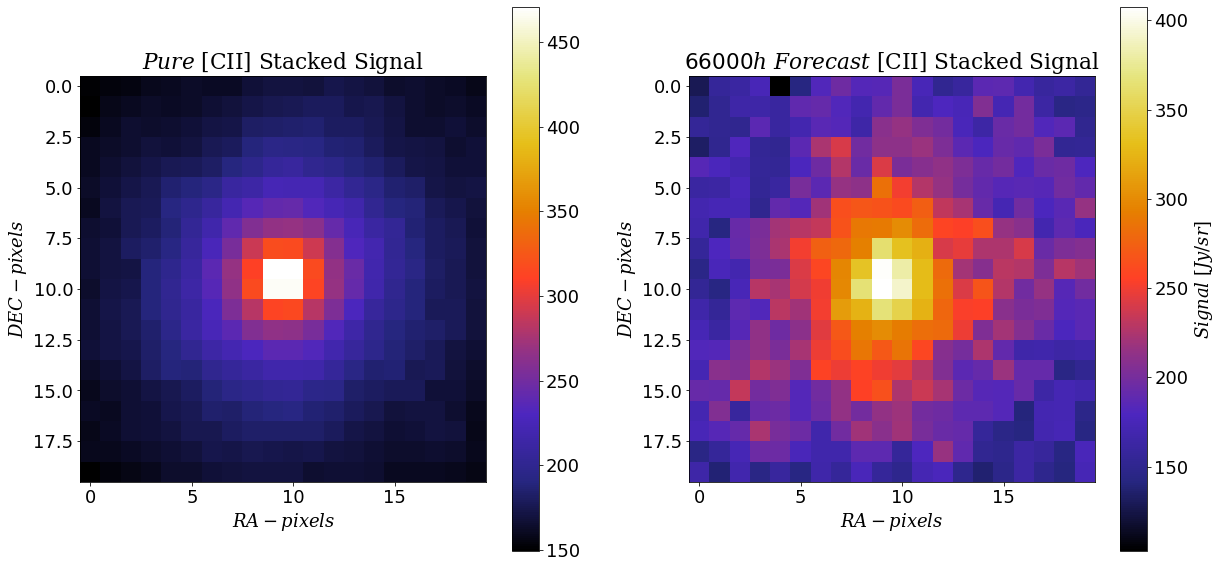

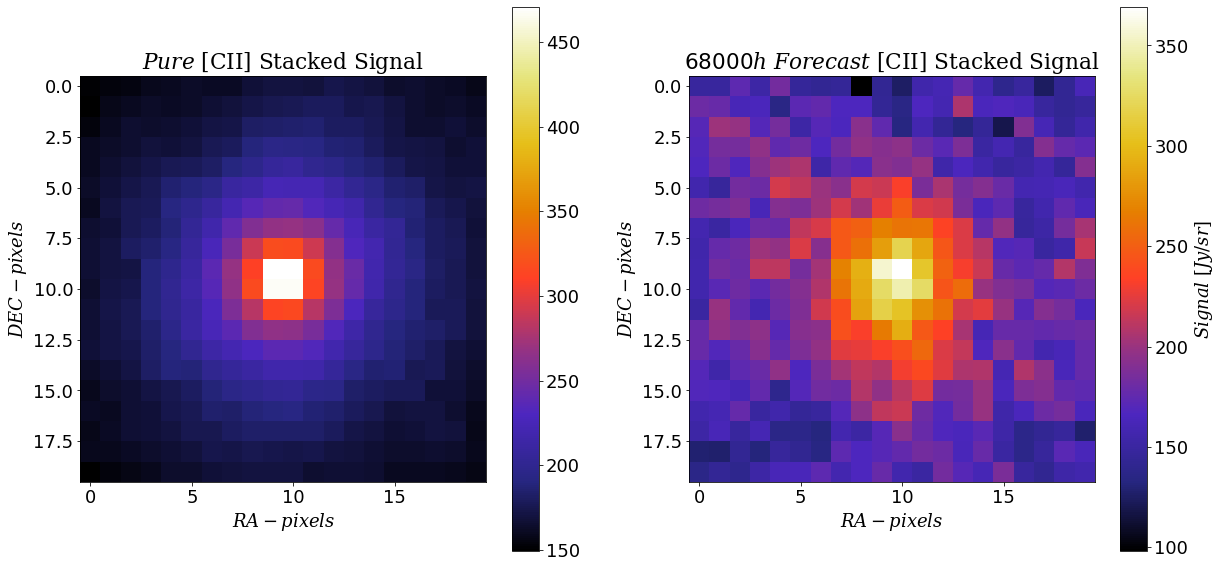

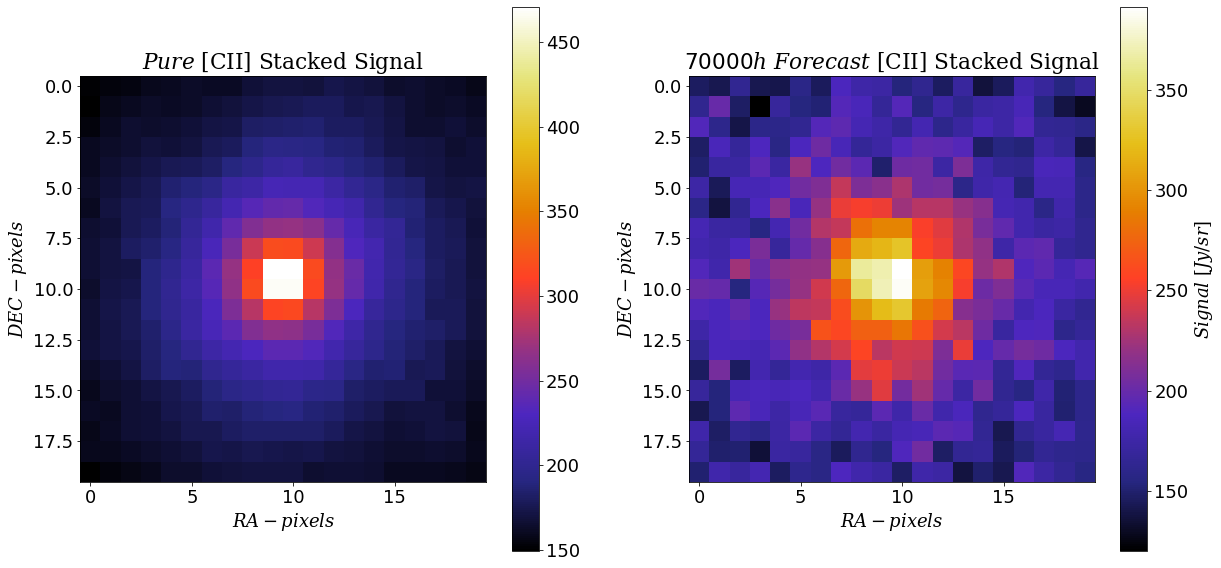

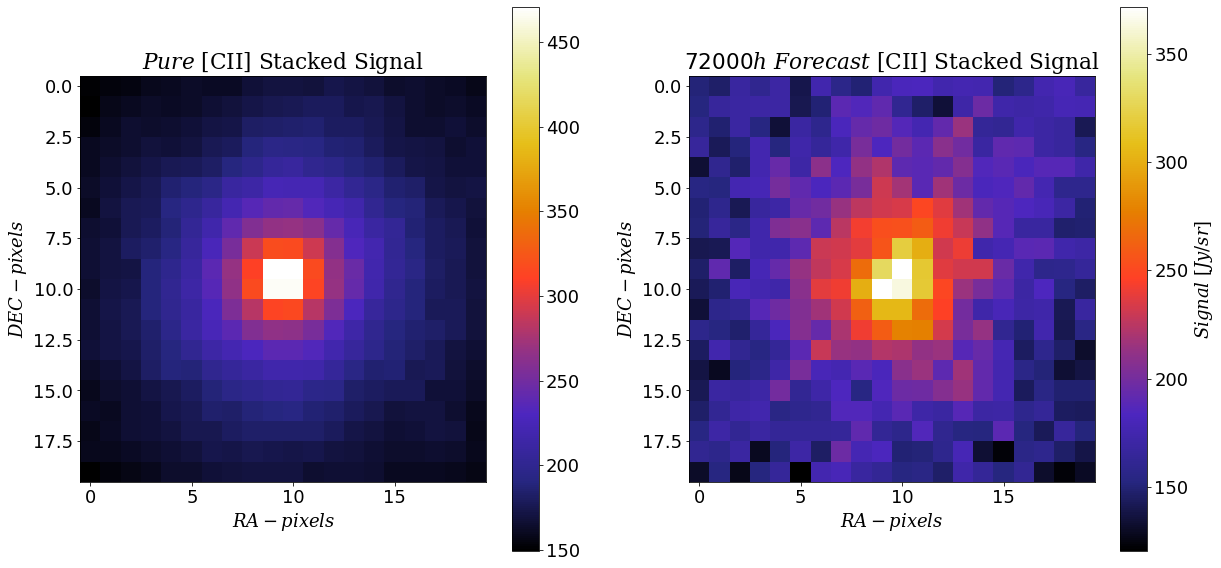

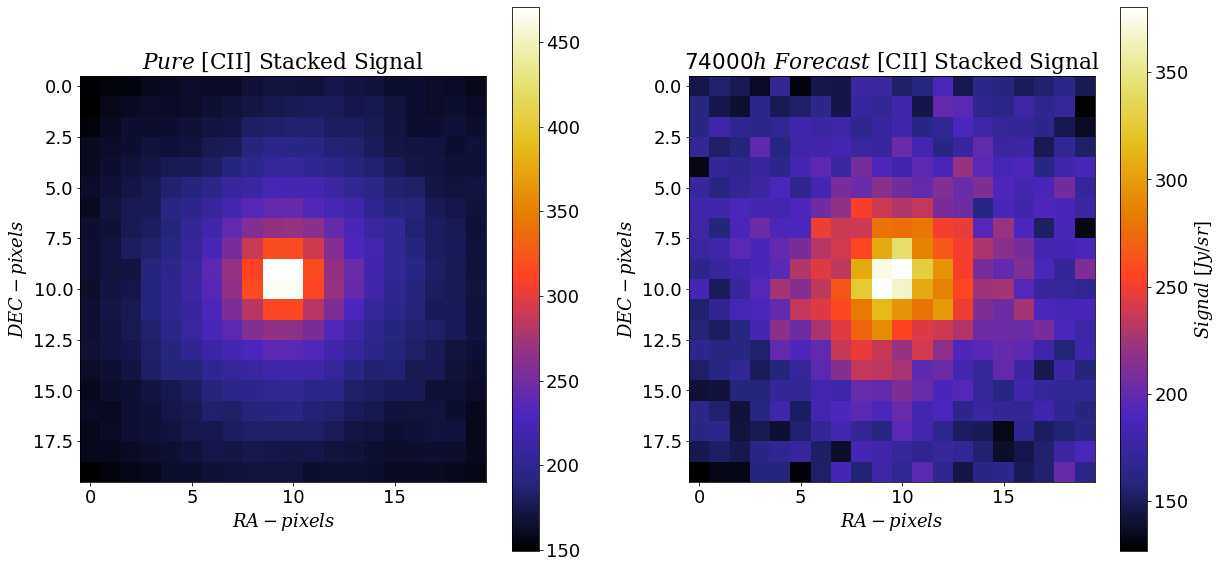

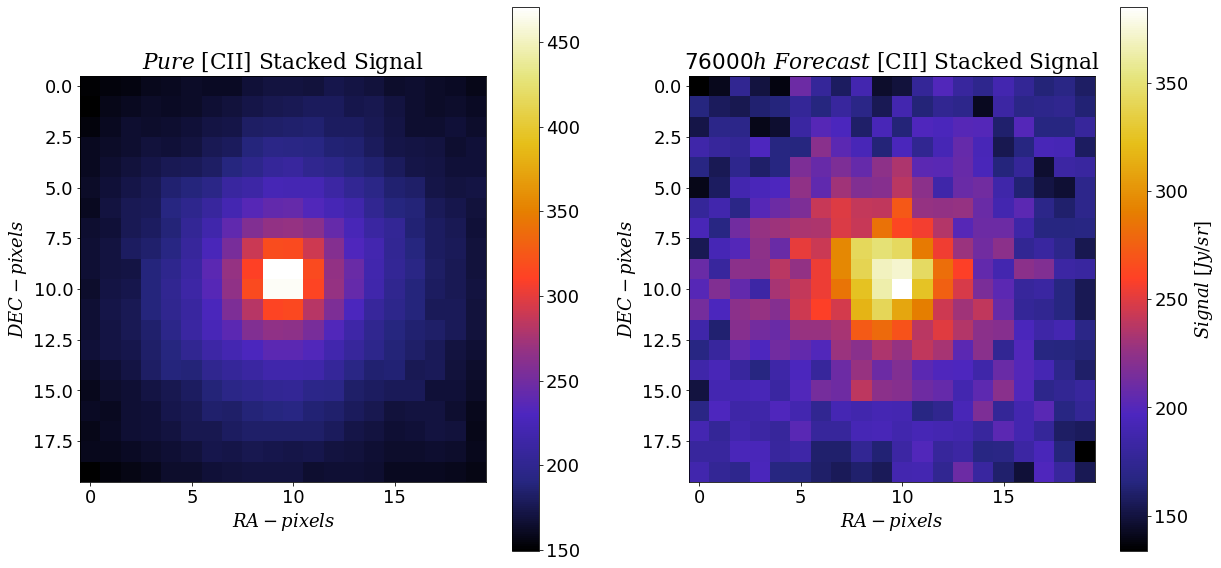

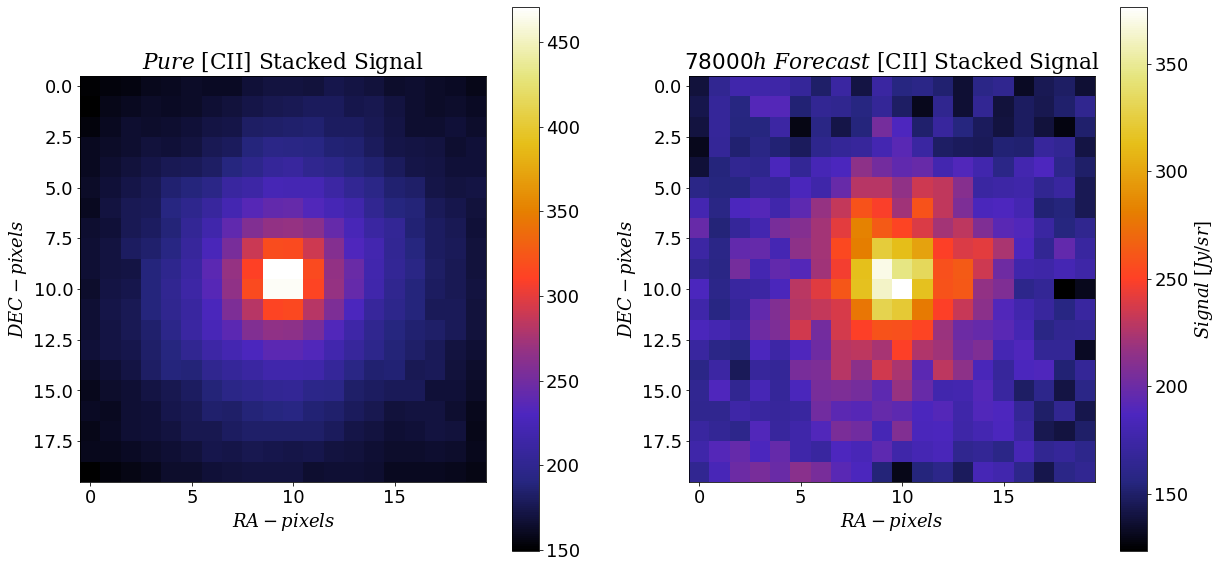

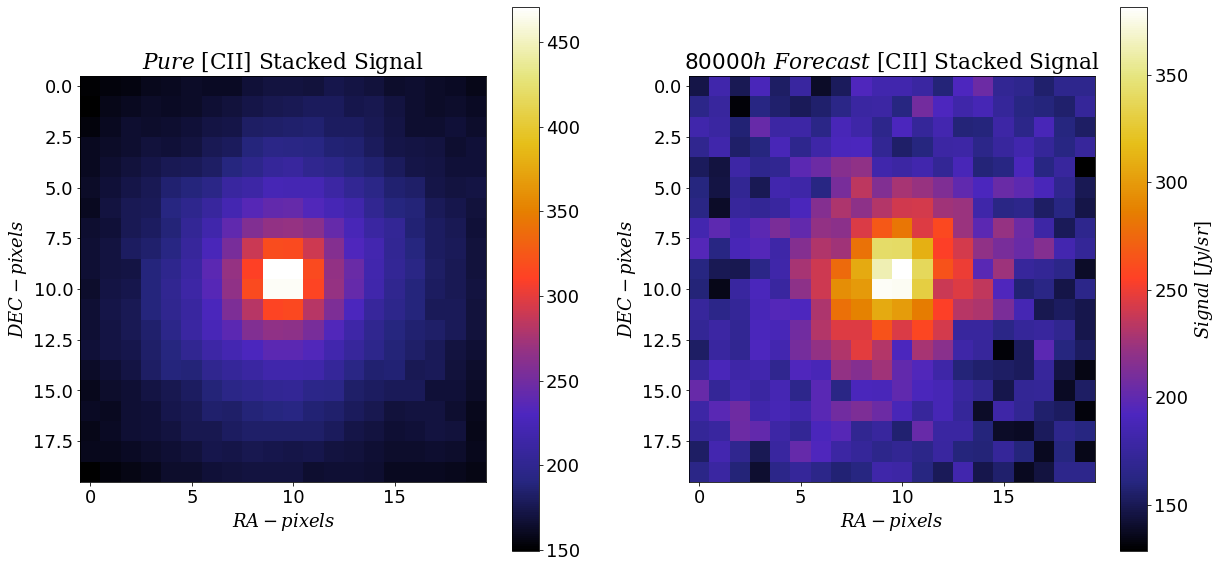

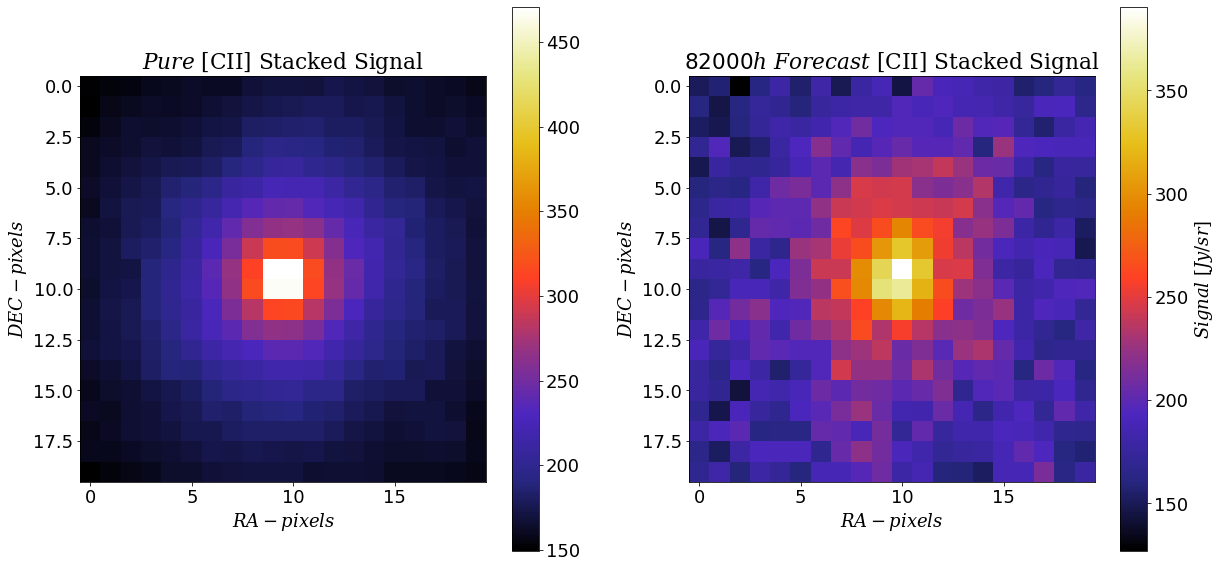

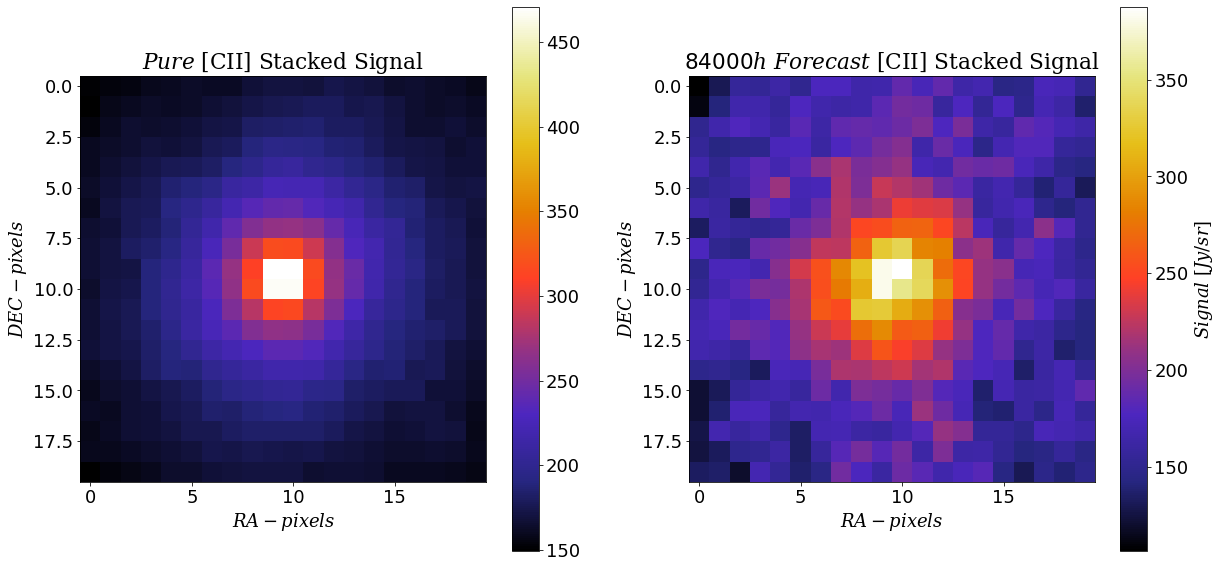

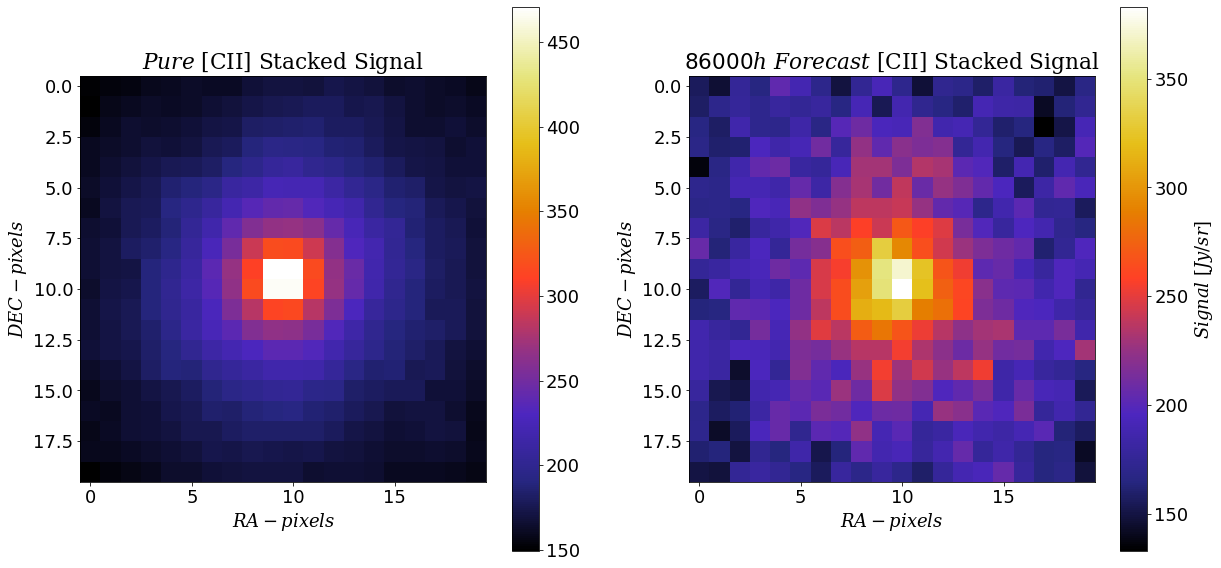

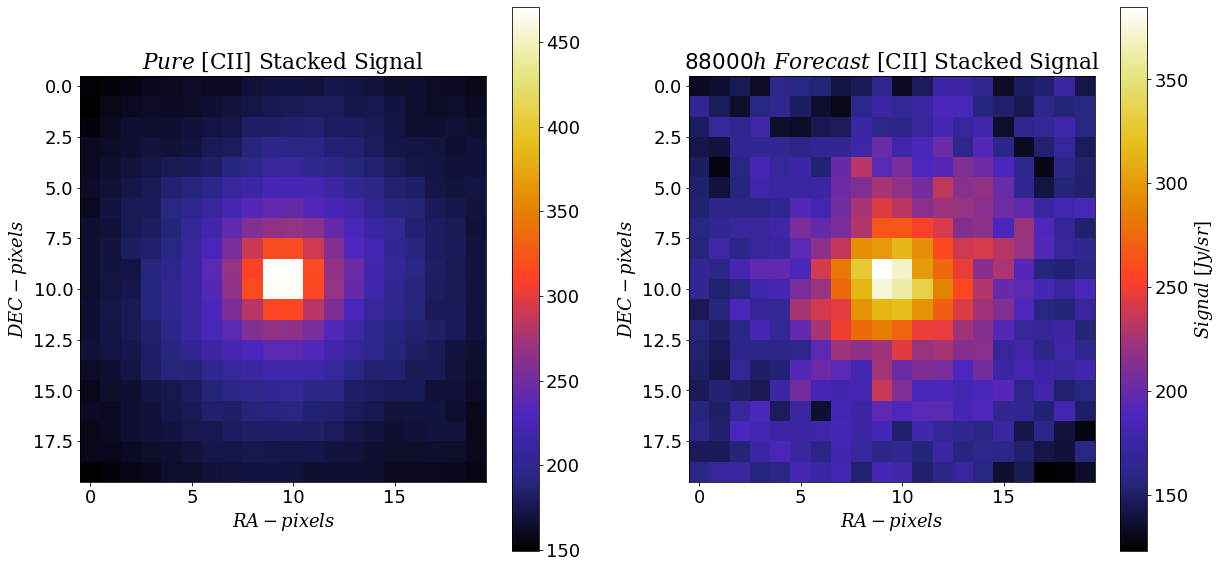

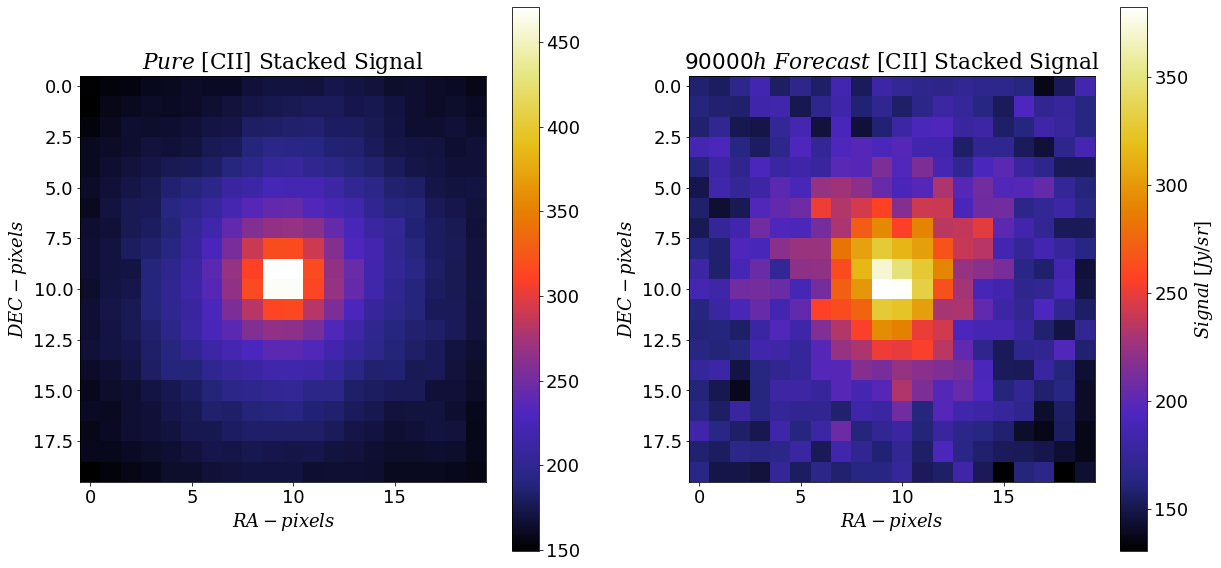

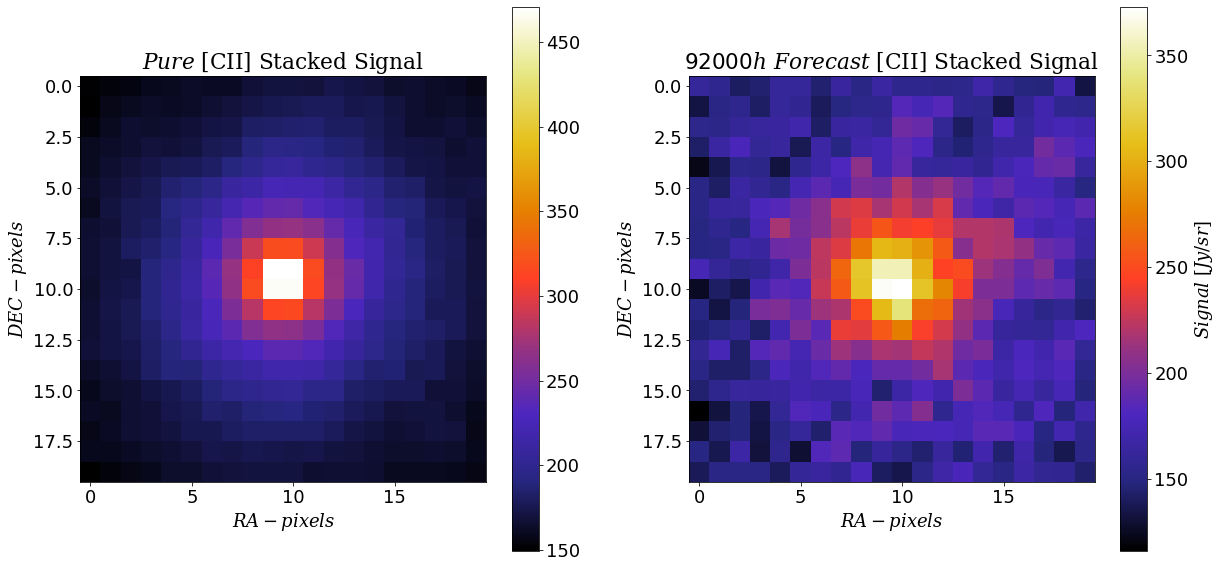

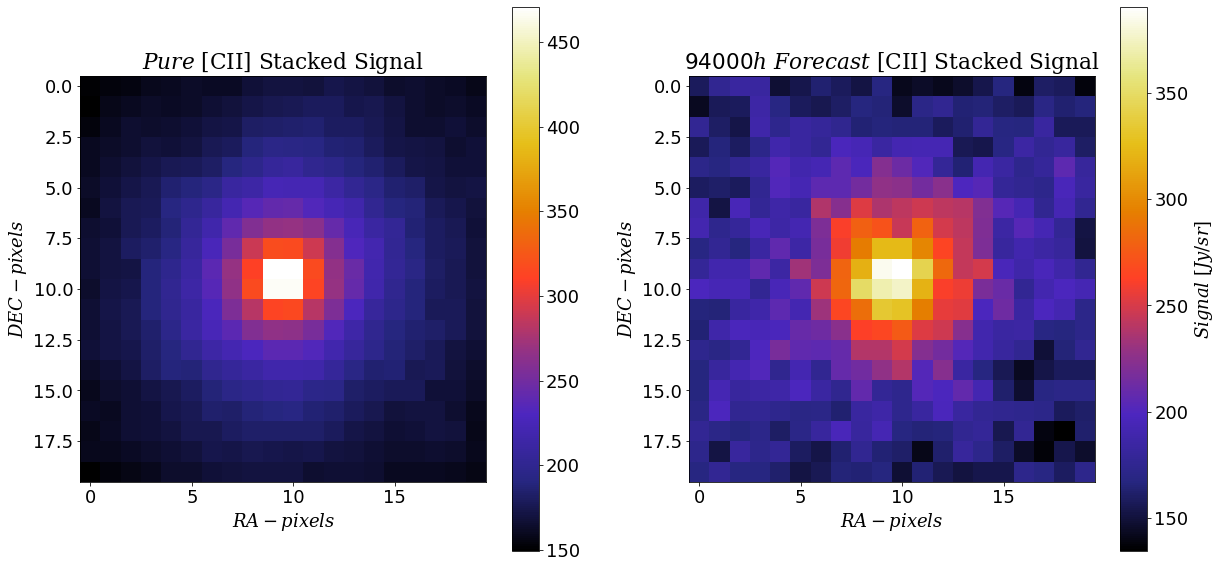

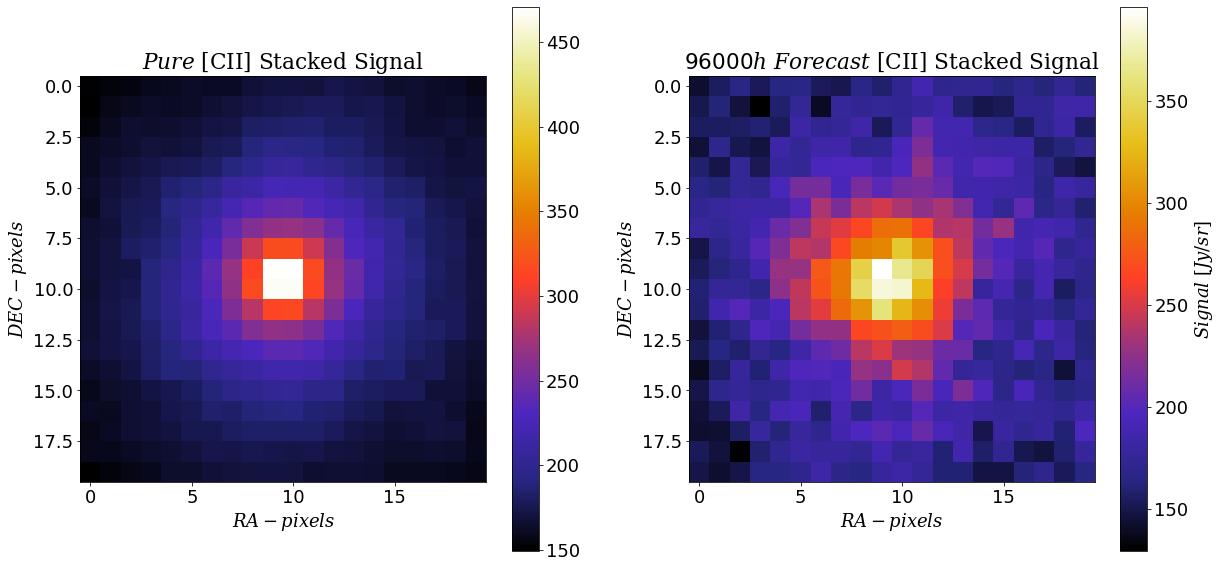

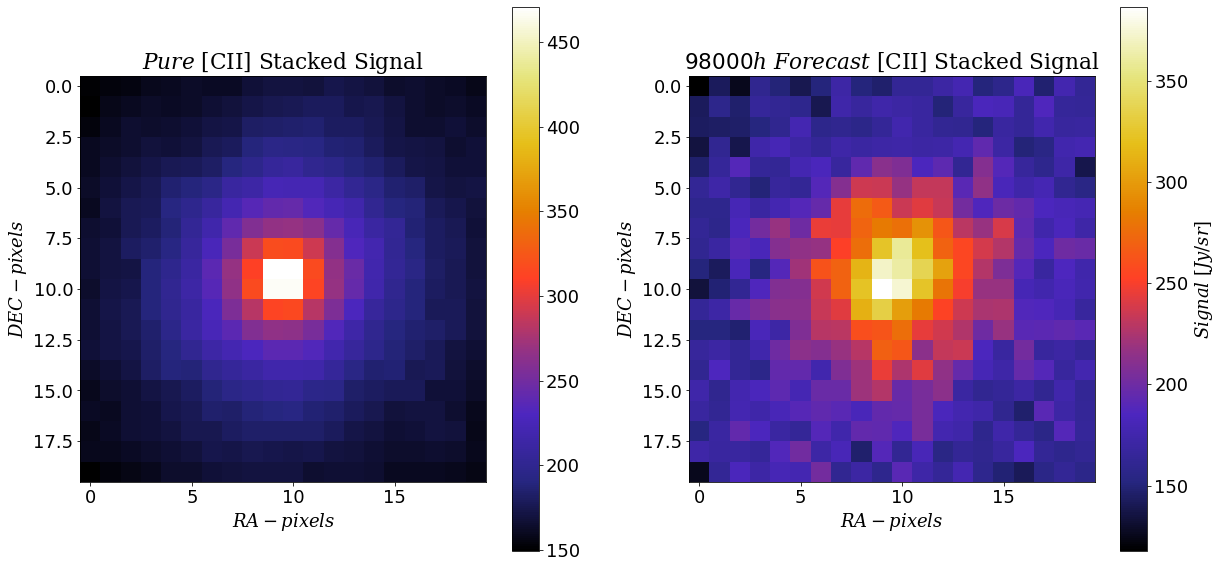

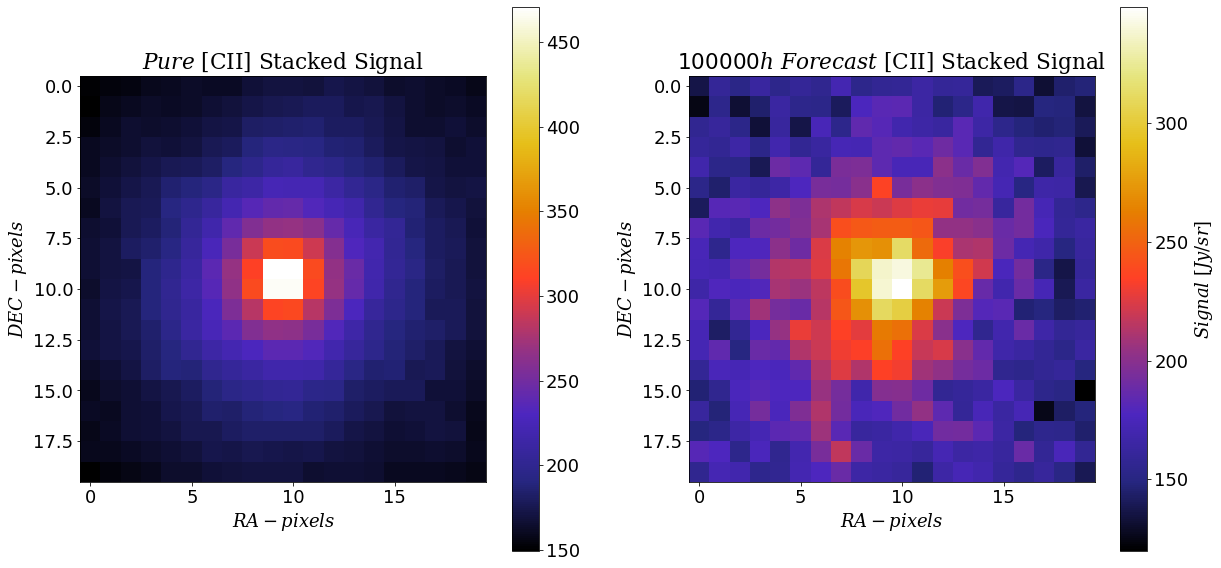

In [146]:
for i in range(len(t_obs_arr)):
    
    fig , axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))
    
    plt.subplot(121)
    plt.imshow(CII_stack_pure, cmap = 'CMRmap')
    plt.title(r'$Pure\ \rm{[CII]}\ Stacked\ Signal$', math_fontfamily = 'dejavuserif')
    plt.xlabel(r'$RA-pixels$', math_fontfamily='dejavuserif')
    plt.ylabel(r'$DEC-pixels$', math_fontfamily='dejavuserif')
    plt.colorbar()

    plt.subplot(122)
    plt.imshow(np.nanmean(noisy_tot_mov[i], axis = 0), cmap = 'CMRmap')
    cb = plt.colorbar()
    cb.set_label(label = r'$Signal\ [Jy/sr]$', math_fontfamily = 'dejavuserif')
    plt.title(str(round(t_obs_arr[i]))+r'$h\ Forecast\ \rm{[CII]}\ Stacked\ Signal$', math_fontfamily = 'dejavuserif')
    plt.xlabel(r'$RA-pixels$', math_fontfamily = 'dejavuserif')
    plt.ylabel(r'$DEC-pixels$', math_fontfamily = 'dejavuserif')
    
    plt.savefig('gif_snaps/'+str(i)+'.png')

In [147]:
list_stack = ['gif_snaps/'+str(i)+'.png' for i in range(len(t_obs_arr))]

In [149]:
with imageio.get_writer('stacked_map.gif', mode='I') as writer:
    for filename in list_stack:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_4043815/2224530241.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
